# Capstone Project: TrekPredict - Katya Kogan - Part 1 
---

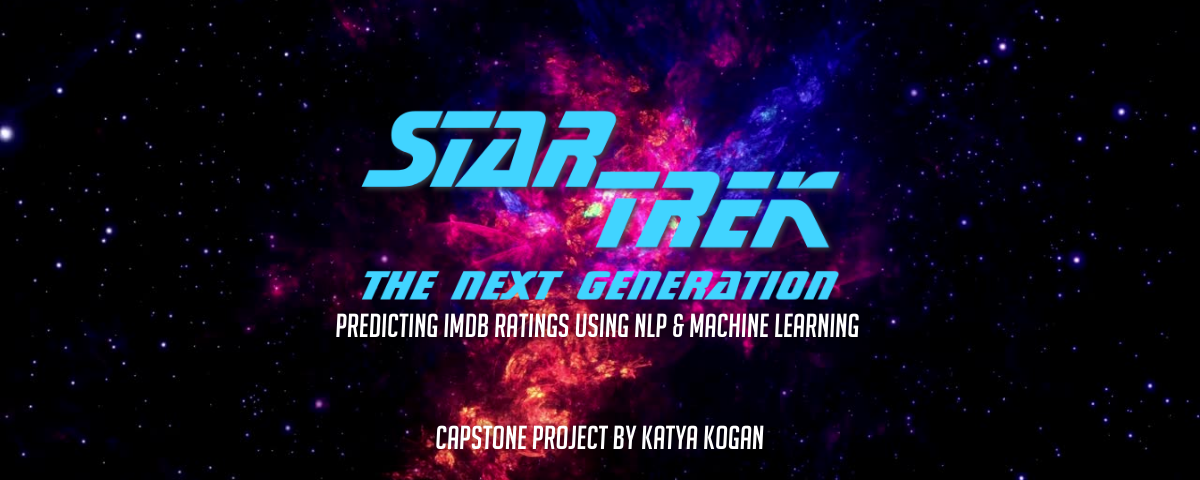

### Goal: Predict the IMDB ratings from the scripts of Star Trek: The Next Generation, by each character's lines. 
This can have very useful real world applications in the film industry. With a model like this, scriptwriters can refer to it and determine if the episode(s) may be a hit or miss based on the character's spoken parts. In the long run, using a model like this could save producers of television shows tens of thousands of dollars in costs. On average, an episode of Star Trek: The Next Generation costs around 1.3 million dollars in production needs. Imagine producing an episode, only to find out that all of the hard work goes down the drain with poor reviews because of reduction in a certain character's spoken parts. Having producers make the choice of using a tool like an IMDB predictor ahead of time, they could save themselves a lot of grief in staying ahead of the curve (and maintaing a good rating!) before going into production.

**Background** 

Star Trek: The Next Generation is a science fiction tv series that took place from the late 80's into the late 90's, plus some movies in the early 2000's. In its heyday, it had an average of 20 million viewers, and still holds widespread popularity today. Since, we're focusing on this particular show, having a good idea of what each character does before exploring the data can be useful to know if you never watched this show before. Here's a quick list of the main cast of characters, some recurring villians and guest stars that existed across the whole show (plus this list of characters is what we're working with for our project).

- `PICARD`: Jean-Luc Picard is the Captain of the starship, USS Enterprise (NCC-1701-D), or known as the Enterprise-D (fourth generation starship) 
- `RIKER`: Commander William Riker is the second-in-command of the Enterprise, alongside Picard (who refers Riker as, "Number One" often)
- `DATA`: Data is a self-aware, sapient, sentient and anatomically fully functional male android who serves as the second officer and chief operations officer, he doesn't have any emotions. 
- `GEORDI`: Geordi La Forge is the Chief Engineer of the ship,and he has been blind since his birth and uses technological devices that allow him to see (he wears a VISOR) 
- `TROI`: Deanna Troi is a half-human, half-Betazoid and has the psionic ability to sense emotions and communicate telepathically. She serves as the ship's counselor on USS Enterprise-D
- `WORF`: Worf is the chief of security aboard the Enterprise-D, and holds the rank of Lt. Commander, and comes from the species called Klingons (a warrior-like, honor-bound species) 
- `BEVERLY`: Beverly Crusher is the chief medical officer aboard the Enterprise-D, and was an occasional romantic interest of Picard, she is also the mother to Wesley. 
- `WES`: Wesley Crusher is the son of Beverly Crusher, and played the role of an incredibly bright and smart teenager aboard the Enterprise. He would eventually acquire the rank of Ensign, and go to Starfleet Academy. He played a major role with Data and Geordi solving complex scientific and engineering problems. 
- `GUINAN`: The character is an alien who is several hundred years old and is noted for her warmth and folk wisdom, which she often uses to defuse difficult situations or comfort other characters aboard the ship as they struggle with something. She runs the establishment called Ten Forward, where the crew goes to relax. 
- `PULASKI`: Katherine Pulaski replaced Beverly Crusher's role as the chief medical officer on the ship for one season. 
- `TASHA`: Tasha Yar is chief of security aboard the Starfleet starship USS Enterprise-D and carries the rank of lieutenant, and she was killed off near the end of the first season. 
- `LORE`:  Lore is a prototype android and the "brother" of main character Data. In TNG, Lore is characterized as a frighteningly evil version of the android Data that massacres the colonists of Omicron Theta, Data and Lore's homeworld. Throughout the series, Lore is sometimes depicted as being almost charming and friendly and is able to manipulate Data through lies and emotions.
- `Q`:  He is an extra-dimensional being of unknown origin who possesses immeasurable power over time, space, the laws of physics, and reality itself, being capable of altering it to his whim. He's considered to be omnipotent. 

The dataset was received from [here](https://github.com/RTrek/startrekTNGdataset), a GitHub repository of one very nerdy person.  

--- 
The goal in this notebook is to clean the dataset, and preprocess it for modeling, along with some handy visualizations. Let's begin with some EDA (Exploratory Data Analysis), as well as cleaning and modifying the data accordingly for our future models. 

In [1]:
# import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from functools import reduce

import warnings
warnings.filterwarnings('ignore')
# ensure plots load inline
%matplotlib inline
#give better plot style
plt.style.use('ggplot')

In [2]:
# read in the dataset
startrek_data = pd.read_csv(r"C:\Users\Katya\Documents\GitHub\Capstone-Project---BrainStation\Data\TNG.csv.gz", encoding= 'latin-1')

In [3]:
# take a look at the size
startrek_data.shape

(110176, 18)

There are 110,176 rows and 18 columns in this dataset. Let's take a look at it. 

In [4]:
startrek_data.head(10)

Unnamed: 0                episode productionnumber setnames characters  \
0           1  encounter at farpoint              NaN      NaN        NaN   
1           2  encounter at farpoint              NaN      NaN        NaN   
2           3  encounter at farpoint              NaN      NaN        NaN   
3           4  encounter at farpoint              NaN      NaN        NaN   
4           5  encounter at farpoint              NaN      NaN        NaN   
5           6  encounter at farpoint              NaN      NaN        NaN   
6           7  encounter at farpoint              NaN      NaN        NaN   
7           8  encounter at farpoint              NaN      NaN        NaN   
8           9  encounter at farpoint              NaN      NaN        NaN   
9          10  encounter at farpoint              NaN      NaN        NaN   

      act scenenumber  scenedetails  partnumber         type           who  \
0  TEASER         1             NaN           1  description           NaN   
1  TEASER         1             NaN           2       speech   PICARD V.O.   
2  TEASER         2             NaN           3  description           NaN   
3  TEASER         2             NaN           4       speech   PICARD V.O.   
4  TEASER         3             NaN           5  description           NaN   
5  TEASER         3             NaN           6       speech   PICARD V.O.   
6  TEASER         4             NaN           7  description           NaN   
7  TEASER         4             NaN           8       speech   PICARD V.O.   
8  TEASER         5             NaN           9  description           NaN   
9  TEASER         5             NaN          10       speech   PICARD V.O.   

                                                text  speechdescription  \
0   The U.S.S. Enterprise NCC 1701-D traveling at...              False   
1   Captain's log, stardate 42353.7. Our destinat...              False   
2         on the gigantic new Enterprise NCC 1701-D.              False   
3   My orders are to examine Farpoint, a starbase...              False   
4   Huge, with a giant wall diagram showing the i...              False   
5   acquainted with my new command, this Galaxy C...               True   
6   Showing the details and size of this enormous...              False   
7   I am still somewhat in awe of its size and co...              False   
8   With its huge windows revealing the immense s...              False   
9            several key positions, most notably ...               True   

     Released  Episode  imdbRating     imdbID  Season  
0  1987-09-26      1.0         6.9  tt0094030     1.0  
1  1987-09-26      1.0         6.9  tt0094030     1.0  
2  1987-09-26      1.0         6.9  tt0094030     1.0  
3  1987-09-26      1.0         6.9  tt0094030     1.0  
4  1987-09-26      1.0         6.9  tt0094030     1.0  
5  1987-09-26      1.0         6.9  tt0094030     1.0  
6  1987-09-26      1.0         6.9  tt0094030     1.0  
7  1987-09-26      1.0         6.9  tt0094030     1.0  
8  1987-09-26      1.0         6.9  tt0094030     1.0  
9  1987-09-26      1.0         6.9  tt0094030     1.0

Since we are working specifically with the text data for our goal, we need to filter the dataset to only the lines where there is actually speech being said, rather than a scene description (to avoid the nuance of scene notes). 

In [5]:
# filtered to only rows where a charactor spoke in the episode
startrekspeech = startrek_data.loc[startrek_data['type'] == 'speech']

# take a look
startrekspeech.head(10)

Unnamed: 0                episode productionnumber setnames characters  \
1            2  encounter at farpoint              NaN      NaN        NaN   
3            4  encounter at farpoint              NaN      NaN        NaN   
5            6  encounter at farpoint              NaN      NaN        NaN   
7            8  encounter at farpoint              NaN      NaN        NaN   
9           10  encounter at farpoint              NaN      NaN        NaN   
12          13  encounter at farpoint              NaN      NaN        NaN   
13          14  encounter at farpoint              NaN      NaN        NaN   
14          15  encounter at farpoint              NaN      NaN        NaN   
15          16  encounter at farpoint              NaN      NaN        NaN   
16          17  encounter at farpoint              NaN      NaN        NaN   

       act scenenumber  scenedetails  partnumber    type           who  \
1   TEASER         1             NaN           2  speech   PICARD V.O.   
3   TEASER         2             NaN           4  speech   PICARD V.O.   
5   TEASER         3             NaN           6  speech   PICARD V.O.   
7   TEASER         4             NaN           8  speech   PICARD V.O.   
9   TEASER         5             NaN          10  speech   PICARD V.O.   
12  TEASER         7             NaN          13  speech        PICARD   
13  TEASER         7             NaN          14  speech          DATA   
14  TEASER         7             NaN          15  speech        PICARD   
15  TEASER         7             NaN          16  speech          TROI   
16  TEASER         7             NaN          17  speech        PICARD   

                                                 text  speechdescription  \
1    Captain's log, stardate 42353.7. Our destinat...              False   
3    My orders are to examine Farpoint, a starbase...              False   
5    acquainted with my new command, this Galaxy C...               True   
7    I am still somewhat in awe of its size and co...              False   
9             several key positions, most notably ...               True   
12   You will agree, Data, that Starfleet's instru...              False   
13   Difficult ... how so? Simply solve the myster...              False   
14                                 As simple as that.               True   
15   Farpoint Station. Even the name sounds myster...              False   
16   The problem, Data, is that another life form ...              False   

      Released  Episode  imdbRating     imdbID  Season  
1   1987-09-26      1.0         6.9  tt0094030     1.0  
3   1987-09-26      1.0         6.9  tt0094030     1.0  
5   1987-09-26      1.0         6.9  tt0094030     1.0  
7   1987-09-26      1.0         6.9  tt0094030     1.0  
9   1987-09-26      1.0         6.9  tt0094030     1.0  
12  1987-09-26      1.0         6.9  tt0094030     1.0  
13  1987-09-26      1.0         6.9  tt0094030     1.0  
14  1987-09-26      1.0         6.9  tt0094030     1.0  
15  1987-09-26      1.0         6.9  tt0094030     1.0  
16  1987-09-26      1.0         6.9  tt0094030     1.0

In [6]:
# take a look at the shape
startrekspeech.shape

(68487, 18)

In [7]:
# take a look at the types 
startrekspeech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68487 entries, 1 to 110173
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         68487 non-null  int64  
 1   episode            68487 non-null  object 
 2   productionnumber   67797 non-null  object 
 3   setnames           61980 non-null  object 
 4   characters         62339 non-null  object 
 5   act                68487 non-null  object 
 6   scenenumber        68487 non-null  object 
 7   scenedetails       0 non-null      float64
 8   partnumber         68487 non-null  int64  
 9   type               68487 non-null  object 
 10  who                68486 non-null  object 
 11  text               68487 non-null  object 
 12  speechdescription  68487 non-null  bool   
 13  Released           67739 non-null  object 
 14  Episode            67739 non-null  float64
 15  imdbRating         67739 non-null  float64
 16  imdbID             67

### Data Dictionary

Filtering the data to only the spoken parts reduced the dataset to 62% of the original size. Now we're going to drop some columns as some of them are not relevant to our needs, as most of this information is related to the production of the show. 

We'll be dropping: 
- `Unnamed: 0` : this is a column that showed the order of the dialogue spoken, since we already filtered the set for speech, this is no longer needed. 
- `productionnumber` : the production number of the episode
- `setnames` : the names of the set
- `characters` : a list of characters that appear in the episode
- `act` : the act number within the episode
- `scenenumber` : the scene number within the act of the episode
- `scenedetails` : the details of a particular scene within the episode
- `partnumber` : the part number of the scene within the act of an episode 
- `type` : contained either 'speech' or 'description', since we already filtered for speech, we can drop this column
- `speechdescription`: shows if the speech contained a speech description for the particular line (which we can clean out) 
- `imdbID`: the ID number of the imdb rating

We'll be keeping: 
- `episode` : this shows the name of the episode 
- `Episode` : the episode number
- `Season` : the season number
- `who` : the character name(s)
- `Released`: the release date of the episode
- `text` : the line spoken by the character(s) for the row
- `imdbRating` : the target variable, our imdb rating

We're going to create our new dataframe that we'll working with. After its creation, we'll check for missing/null or duplicated values. 

In [8]:
# create a new dataframe with these filtered columns
StarTrek_df = startrekspeech.filter(['episode', 'Episode', 'Season', 'Released', 'who', 'text', 'imdbRating'], axis=1)

#sanity check
StarTrek_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68487 entries, 1 to 110173
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   episode     68487 non-null  object 
 1   Episode     67739 non-null  float64
 2   Season      67739 non-null  float64
 3   Released    67739 non-null  object 
 4   who         68486 non-null  object 
 5   text        68487 non-null  object 
 6   imdbRating  67739 non-null  float64
dtypes: float64(3), object(4)
memory usage: 4.2+ MB


### Cleaning and EDA

#### Missing Values and Duplicated Rows

Now we'll begin looking into missing values and any potential duplicate rows. 

In [9]:
# check for null/missing values
StarTrek_df.isna().sum()

episode         0
Episode       748
Season        748
Released      748
who             1
text            0
imdbRating    748
dtype: int64

There are 748 missing values across the rows, as well as one missing character. Let's double check for duplicates before we start handling this. 

In [10]:
#print the total number of duplicated rows
print(f"There are {StarTrek_df.duplicated().sum()} duplicate rows")

There are 854 duplicate rows


There are 854 duplicate rows, let's take a look to make sure that they are *actually* duplicated rows. 

In [11]:
# show duplicate rows
StarTrek_df.loc[StarTrek_df.duplicated(keep=False), :]

episode  Episode  Season    Released      who  \
95      encounter at farpoint      1.0     1.0  1987-09-26     WORF   
156     encounter at farpoint      1.0     1.0  1987-09-26     WORF   
455     encounter at farpoint      1.0     1.0  1987-09-26    RIKER   
515     encounter at farpoint      1.0     1.0  1987-09-26    RIKER   
1191            the naked now      2.0     1.0  1987-10-03   PICARD   
...                       ...      ...     ...         ...      ...   
109920     all good things...     25.0     7.0  1994-05-23   PICARD   
109975     all good things...     25.0     7.0  1994-05-23     DATA   
110029     all good things...     25.0     7.0  1994-05-23     DATA   
110106     all good things...     25.0     7.0  1994-05-23   PICARD   
110126     all good things...     25.0     7.0  1994-05-23     WORF   

                    text  imdbRating  
95             Aye, sir.         6.9  
156            Aye, sir.         6.9  
455                 Sir?         6.9  
515                 Sir?         6.9  
1191        Picard here.         6.5  
...                  ...         ...  
109920        Thank you.         8.5  
109975         Aye, sir.         8.5  
110029         Yes, sir.         8.5  
110106        Thank you.         8.5  
110126   Stardate 47988.         8.5  

[1534 rows x 7 columns]

We can confirm that they are indeed duplicated, which leads us to the next step, dropping the duplicate values. 

We'll use`drop_duplicates()` on the original data, then we'll assign a new index using `reset_index()`. If we don't do this, the index will be missing values as a result of the drop, which doesn't help us in the future - as we have to maintain a defined index for ease of exploring. 

In [12]:
# dropping the duplicate rows in place
StarTrek_df.drop_duplicates(inplace=True)

In [13]:
# reseting the index 
StarTrek_df.reset_index(inplace=True, drop=True)

In [14]:
# sanity check
print(f"There are {StarTrek_df.duplicated().sum()} duplicate rows")

There are 0 duplicate rows


Now that we've dropped our duplicate rows, let's take another look at the missing values once more. 

In [15]:
# show null rows
StarTrek_df[StarTrek_df.isna().any(axis=1)]

episode  Episode  Season    Released             who  \
47876        time's arrow      NaN     NaN         NaN   PICARD (V.O.)   
47877        time's arrow      NaN     NaN         NaN   PICARD (V.O.)   
47878        time's arrow      NaN     NaN         NaN       SCIENTIST   
47879        time's arrow      NaN     NaN         NaN          PICARD   
47880        time's arrow      NaN     NaN         NaN            DATA   
...                   ...      ...     ...         ...             ...   
50873             rascals      NaN     NaN         NaN          GUINAN   
50874             rascals      NaN     NaN         NaN        YOUNG RO   
50875             rascals      NaN     NaN         NaN        YOUNG RO   
50876             rascals      NaN     NaN         NaN          GUINAN   
54117  birthright: part 2     17.0     6.0  1993-02-27             NaN   

                                                    text  imdbRating  
47876   Captain's log, stardate 45959.1. The Enterpri...         NaN  
47877   All we've been told is that evidence has been...         NaN  
47878   Work crews were down here installing seismic ...         NaN  
47879   And it's been determined that they date back ...         NaN  
47880   The biofocal vision aide is typical of the er...         NaN  
...                                                  ...         ...  
50873                              Only if you're ready.         NaN  
50874   It's not quite as bad as I remembered it... b...         NaN  
50875                               We better get going.         NaN  
50876   There's no hurry. The Transporter will still ...         NaN  
54117   van'aj javDIch Qong DIr Sa'VIch ghIH yot quel...         7.3  

[741 rows x 7 columns]

#### Imputing Missing Values 

We can see that there are missing values for `Episode`, `Season`, `Released`, and `imdbRating`. We're going to plug in these values manually, as this information is easily found [here](https://www.imdb.com/title/tt0708828/) (which is specifically for one episode, "time's arrow"). We're going to look up specifically for the one episode, "Time's Arrow", and input values. 

In [16]:
#looking up one episode
StarTrek_df.loc[StarTrek_df['episode'] == "time's arrow"]

episode  Episode  Season Released             who  \
47876  time's arrow      NaN     NaN      NaN   PICARD (V.O.)   
47877  time's arrow      NaN     NaN      NaN   PICARD (V.O.)   
47878  time's arrow      NaN     NaN      NaN       SCIENTIST   
47879  time's arrow      NaN     NaN      NaN          PICARD   
47880  time's arrow      NaN     NaN      NaN            DATA   
...             ...      ...     ...      ...             ...   
48270  time's arrow      NaN     NaN      NaN         BEVERLY   
48271  time's arrow      NaN     NaN      NaN          PICARD   
48272  time's arrow      NaN     NaN      NaN            TROI   
48273  time's arrow      NaN     NaN      NaN           RIKER   
48274  time's arrow      NaN     NaN      NaN            TROI   

                                                    text  imdbRating  
47876   Captain's log, stardate 45959.1. The Enterpri...         NaN  
47877   All we've been told is that evidence has been...         NaN  
47878   Work crews were down here installing seismic ...         NaN  
47879   And it's been determined that they date back ...         NaN  
47880   The biofocal vision aide is typical of the er...         NaN  
...                                                  ...         ...  
48270   These strands appear to be biomagnetic... var...         NaN  
48271                                   A life-form... ?         NaN  
48272   No. There is no life here... what I have sens...         NaN  
48273   My God... they're delivering more of them... ...         NaN  
48274                Will, look at what he's carrying...         NaN  

[399 rows x 7 columns]

In [17]:
# plug in values manually (episode: time's arrow)
StarTrek_df.at[47876:48275, 'Season'] = int(5)
StarTrek_df.at[47876:48275, 'imdbRating'] = 8.4
StarTrek_df.at[47876:48275, 'Episode'] = int(26)
StarTrek_df.at[47876:48275, 'Released'] = '1995-06-14'

In [18]:
# sanity check for the particular episode
StarTrek_df.loc[StarTrek_df['episode'] == "time's arrow"]

episode  Episode  Season    Released             who  \
47876  time's arrow     26.0     5.0  1995-06-14   PICARD (V.O.)   
47877  time's arrow     26.0     5.0  1995-06-14   PICARD (V.O.)   
47878  time's arrow     26.0     5.0  1995-06-14       SCIENTIST   
47879  time's arrow     26.0     5.0  1995-06-14          PICARD   
47880  time's arrow     26.0     5.0  1995-06-14            DATA   
...             ...      ...     ...         ...             ...   
48270  time's arrow     26.0     5.0  1995-06-14         BEVERLY   
48271  time's arrow     26.0     5.0  1995-06-14          PICARD   
48272  time's arrow     26.0     5.0  1995-06-14            TROI   
48273  time's arrow     26.0     5.0  1995-06-14           RIKER   
48274  time's arrow     26.0     5.0  1995-06-14            TROI   

                                                    text  imdbRating  
47876   Captain's log, stardate 45959.1. The Enterpri...         8.4  
47877   All we've been told is that evidence has been...         8.4  
47878   Work crews were down here installing seismic ...         8.4  
47879   And it's been determined that they date back ...         8.4  
47880   The biofocal vision aide is typical of the er...         8.4  
...                                                  ...         ...  
48270   These strands appear to be biomagnetic... var...         8.4  
48271                                   A life-form... ?         8.4  
48272   No. There is no life here... what I have sens...         8.4  
48273   My God... they're delivering more of them... ...         8.4  
48274                Will, look at what he's carrying...         8.4  

[399 rows x 7 columns]

We've successfully input the values for the episode, "Time's Arrow". Now we'll check for more missing values, and plug in the information accordingly. 

In [19]:
# check for more missing values to input
StarTrek_df[StarTrek_df.isna().any(axis=1)]

episode  Episode  Season    Released             who  \
50536             rascals      NaN     NaN         NaN   PICARD (V.O.)   
50537             rascals      NaN     NaN         NaN          PICARD   
50538             rascals      NaN     NaN         NaN          GUINAN   
50539             rascals      NaN     NaN         NaN          PICARD   
50540             rascals      NaN     NaN         NaN          GUINAN   
...                   ...      ...     ...         ...             ...   
50873             rascals      NaN     NaN         NaN          GUINAN   
50874             rascals      NaN     NaN         NaN        YOUNG RO   
50875             rascals      NaN     NaN         NaN        YOUNG RO   
50876             rascals      NaN     NaN         NaN          GUINAN   
54117  birthright: part 2     17.0     6.0  1993-02-27             NaN   

                                                    text  imdbRating  
50536   Captain's Log, Stardate 46235.7 Ensign Ro, Ke...         NaN  
50537   the tertiary level of the dig. They're typica...         NaN  
50538                                        Mmmm-hmmmm.         NaN  
50539   Now, see these markings... they're very simil...         NaN  
50540   So... you went to one of the most beautiful p...         NaN  
...                                                  ...         ...  
50873                              Only if you're ready.         NaN  
50874   It's not quite as bad as I remembered it... b...         NaN  
50875                               We better get going.         NaN  
50876   There's no hurry. The Transporter will still ...         NaN  
54117   van'aj javDIch Qong DIr Sa'VIch ghIH yot quel...         7.3  

[342 rows x 7 columns]

We'll repeat the same process again, and this time we're imputing for the episode, "Rascals" - which the info was found at IMDB again. 

In [20]:
# plug in values manually (episode: Rascals)
StarTrek_df.at[50536:50877, 'Season'] = int(6)
StarTrek_df.at[50536:50877, 'imdbRating'] = 7.4
StarTrek_df.at[50536:50877, 'Episode'] = int(7)
StarTrek_df.at[50536:50877, 'Released'] = '1995-08-23'

In [21]:
# sanity check for the particular episode
StarTrek_df.loc[StarTrek_df['episode'] == "rascals"]

episode  Episode  Season    Released             who  \
50536  rascals      7.0     6.0  1995-08-23   PICARD (V.O.)   
50537  rascals      7.0     6.0  1995-08-23          PICARD   
50538  rascals      7.0     6.0  1995-08-23          GUINAN   
50539  rascals      7.0     6.0  1995-08-23          PICARD   
50540  rascals      7.0     6.0  1995-08-23          GUINAN   
...        ...      ...     ...         ...             ...   
50872  rascals      7.0     6.0  1995-08-23        YOUNG RO   
50873  rascals      7.0     6.0  1995-08-23          GUINAN   
50874  rascals      7.0     6.0  1995-08-23        YOUNG RO   
50875  rascals      7.0     6.0  1995-08-23        YOUNG RO   
50876  rascals      7.0     6.0  1995-08-23          GUINAN   

                                                    text  imdbRating  
50536   Captain's Log, Stardate 46235.7 Ensign Ro, Ke...         7.4  
50537   the tertiary level of the dig. They're typica...         7.4  
50538                                        Mmmm-hmmmm.         7.4  
50539   Now, see these markings... they're very simil...         7.4  
50540   So... you went to one of the most beautiful p...         7.4  
...                                                  ...         ...  
50872                            It's my turn, isn't it?         7.4  
50873                              Only if you're ready.         7.4  
50874   It's not quite as bad as I remembered it... b...         7.4  
50875                               We better get going.         7.4  
50876   There's no hurry. The Transporter will still ...         7.4  

[341 rows x 7 columns]

In [22]:
# check for more missing values to input
StarTrek_df[StarTrek_df.isna().any(axis=1)]

episode  Episode  Season    Released  who  \
54117  birthright: part 2     17.0     6.0  1993-02-27  NaN   

                                                    text  imdbRating  
54117   van'aj javDIch Qong DIr Sa'VIch ghIH yot quel...         7.3

We've successfully input the correct values for these missing episodes. There's only one row left that contains what looks like gibberish in the `text` column. We'll be dropping this row as well. 

In [23]:
# drop null values
StarTrek_df.dropna(inplace=True)

In [24]:
# confirmed no more missing values
StarTrek_df.isna().sum()

episode       0
Episode       0
Season        0
Released      0
who           0
text          0
imdbRating    0
dtype: int64

In [25]:
# sanity check
StarTrek_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67632 entries, 0 to 67632
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   episode     67632 non-null  object 
 1   Episode     67632 non-null  float64
 2   Season      67632 non-null  float64
 3   Released    67632 non-null  object 
 4   who         67632 non-null  object 
 5   text        67632 non-null  object 
 6   imdbRating  67632 non-null  float64
dtypes: float64(3), object(4)
memory usage: 4.1+ MB


#### Checking Dtypes of Columns 

There are some variables that need to be converted to their correct type. For example, the `Episode` and `Season` columns should be integers, as well as the `imdbRating`. In addition to that, the `Released` column is in datetime, and will be adjusted accordingly. 

In [26]:
# assigning dtypes to Episode, Season and Released
StarTrek_df['Episode'] = StarTrek_df['Episode'].astype('int') 
StarTrek_df['Season'] = StarTrek_df['Season'].astype('int') 
StarTrek_df['Released'] = pd.to_datetime(StarTrek_df['Released'])

#sanity check
StarTrek_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67632 entries, 0 to 67632
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   episode     67632 non-null  object        
 1   Episode     67632 non-null  int32         
 2   Season      67632 non-null  int32         
 3   Released    67632 non-null  datetime64[ns]
 4   who         67632 non-null  object        
 5   text        67632 non-null  object        
 6   imdbRating  67632 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), object(3)
memory usage: 3.6+ MB


### Text Data Cleaning

We can see that within the `who` column that there are character names that come as one name, or paired together with a voiceover (V.O.), on-screen (O.S), or paired with another character. We'll be performing some punctuation removal, as well as narrowing down the character column to a singular character name. 

In [27]:
# taking a closer look at the unique values of the who column
StarTrek_df['who'].unique().tolist()

[' PICARD V.O.',
 ' PICARD',
 ' DATA',
 ' TROI',
 ' WORF',
 ' CONN',
 ' "Q" (ELIZABETHAN)',
 ' MEDIC',
 ' "Q" (MARINE CAPTAIN)',
 ' PICARD "Q" (MARINE CAPTAIN) PICARD "Q" (MARINE CAPTAIN)',
 ' "Q" (21ST CENTURY)',
 ' TASHA',
 ' PICARD TROI',
 " PICARD'S INTERCOM VOICE",
 ' MANDARIN-BAILIFF',
 ' FUTURE MILITARY OFFICER',
 ' MILITARY OFFICER',
 ' "Q" (JUDGE)',
 ' "Q" (JUDGE) MANDARIN-BAILIFF',
 ' DATA "Q" (JUDGE)',
 ' OPS',
 " RIKER'S VOICE",
 ' ZORN',
 ' RIKER',
 " ZORN ZORN (Cont'd)",
 ' WESLEY',
 ' BEVERLY',
 ' MARKHAM',
 ' GEORDI/MARKHAM',
 ' GEORDI',
 ' BANDI WOMAN',
 " DATA'S VOICE",
 ' RIKER (V.O.)',
 ' ADMIRAL',
 " PICARD'S VOICE",
 ' PICARD WORF',
 " TROI'S VOICE",
 ' PICARD ZORN',
 ' YOUNG ENSIGN',
 ' COMPUTER VOICE',
 ' RIKER COMPUTER VOICE',
 ' RIKER DATA',
 " WESLEY'S VOICE",
 ' PICARD WES',
 ' BEVERLY WESLEY',
 " TASHA'S VOICE",
 ' WES',
 ' SECURITY VOICE',
 " ZORN'S VOICE",
 ' SECURITY POSITION',
 ' OPERATIONS POSITION',
 " ZORN'S VOICE PICARD",
 ' INTERCOM VOICE',
 ' "Q" 

Notice that within the`who` column that these names would be paired with a 'V.O'/'S.O', an extra "", an errant ' here and there, bracketed words, some have combinations of two or more characters and some characters are referred to in plural form or possessive. 

Now we're cleaning the `who` column of the aforementioned clutter. 

In [28]:
# remove the second name (or any word after the first)
StarTrek_df['who']=StarTrek_df['who'].str.replace(r"^(\s*(?:\S+\s+){1})\S+",r"\1")

# remove any unnecessary spaces
StarTrek_df['who'] = StarTrek_df['who'].str.strip()

# remove leading white spaces
StarTrek_df['who'] = StarTrek_df['who'].str.lstrip()

# remove punctuations 
StarTrek_df['who']=StarTrek_df['who'].str.replace(r"[^-9A-Za-z ]", "")

# Delete everything between the brackets
StarTrek_df['who'] = StarTrek_df['who'].str.replace(r"\(.*\)","")

After manually cleaning the `who` column with Pandas, we'll create a loop where the characters in the list are searched for (and if found, the name gets replaced with the clean version), and if none of the main cast is appearing for the particular row, it gets replaced with 'other'. 

In [29]:
main_cast = ['PICARD','WORF', 'BEVERLY', 'GEORDI', 'TROI',  'DATA', 'RIKER', 'WES', 'GUINAN', 'TASHA', 'PULASKI', 'Q' , 'LORE']

# loop through the rows and indexes of the StarTrek_df
for index, row in StarTrek_df.iterrows():
    # loop through the characters in main_cast
    for character in main_cast:
        # check to see if the character is in the who column from the main_cast
        if character in StarTrek_df.at[index, "who"]:
            # replace value with character 
            StarTrek_df.at[index, "who"] = character
    # check to see if the character is not in the main_cast        
    if StarTrek_df.at[index, "who"] not in main_cast:
        # replace with 'other'
        StarTrek_df.at[index, "who"] = "OTHER"
            

In [30]:
# quick check to see if it's all singular names 
StarTrek_df['who'].unique().tolist()

['PICARD',
 'DATA',
 'TROI',
 'WORF',
 'OTHER',
 'Q',
 'TASHA',
 'RIKER',
 'WES',
 'BEVERLY',
 'GEORDI',
 'LORE',
 'GUINAN',
 'PULASKI']

Now that the `who` column has been cleaned and organized properly, let's look at the meat of the dataset - our `text`. In order for our NLP analysis to go smoothly, we need to make sure the text is all lowercase (otherwise, we get unwanted repetitions), and remove punctuations as well. 

In [31]:
# converting the text to lowercase 
StarTrek_df['text']= StarTrek_df['text'].str.lower()

# remove punctuation and unnecessary characters 
StarTrek_df['text']=StarTrek_df['text'].str.replace(r"[^-9A-Za-z ]", "")

# Delete everything between the brackets
StarTrek_df['text'] = StarTrek_df['text'].str.replace(r"\(.*\)","")

StarTrek_df['text'] = StarTrek_df['text'].str.replace('-', '', regex=True)

We're creating a class with the purpose to remove stopwords and stem the text data for us, check out this [reference](https://towardsdatascience.com/sentiment-analysis-with-text-mining-13dd2b33de27) where I received some inspiration, where I used some parts of the helper function from the original author. 


In [32]:
class CleanText(BaseEstimator, TransformerMixin):
    '''
    Defining the class and method to clean text data
    '''
    
    # function for removing stopwords specifically
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't"]
        # split the words
        words = input_text.split() 
        # cleaning the words and removing stopwords (keeping those whitelisted as well)
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words)
    
    #function to stem words
    def stemming(self, input_text):
        #using the porterstemmer for stemming
        porter = PorterStemmer()
        #split the words
        words = input_text.split() 
        # finding the words to stem
        stemmed_words = [porter.stem(word) for word in words]
        # return stemmed words separated by a whitespace
        return " ".join(stemmed_words)
    
    # fit the text data
    def fit(self, X, y=None, **fit_params):
        return self
    
    # transform the text using the first two functions
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_stopwords).apply(self.stemming)
        return clean_X
    

Now we can use this class to clean our `text` completely, because we'll be using the text data to feature engineer our character's spoken parts. 

In [33]:
#Instantiate the class method
clean = CleanText()
#Fit and transform `text` column
body = clean.fit_transform(StarTrek_df['text'])

In [34]:
#sanity check
StarTrek_df['text']

0         captains log stardate  our destination is pla...
1         my orders are to examine farpoint a starbase ...
2         acquainted with my new command this galaxy cl...
3         i am still somewhat in awe of its size and co...
4                      several key positions most notably 
                               ...                        
67628                               would you care to deal
67629                                         oh thank you
67630     i should have done this a long time ago i was...
67631                              you were always welcome
67632     so five card stud nothing wild the skys the l...
Name: text, Length: 67632, dtype: object

Now that we have a cleaned dataset, now let's do some feature engineering and add/modify more useful columns that could help us with our EDA. 

Next, we're adding a column that counts the number of words for each text line. 

In [35]:
# counts the number of words within the text column and input the value
StarTrek_df['Word_Count'] = [len(x.split()) for x in StarTrek_df['text'].tolist()]

In [36]:
#sanity check
StarTrek_df.sample(10)

episode  Episode  Season   Released      who  \
59984              dark page        7       7 1993-10-30     TROI   
49869                schisms        5       6 1992-10-17   GEORDI   
62017            the pegasus       12       7 1994-01-08   PICARD   
14613           time squared       13       2 1989-04-01  PULASKI   
44928       cause and effect       18       5 1992-03-21     DATA   
6456   when the bough breaks       16       1 1988-02-13      WES   
44010             power play       15       5 1992-02-22    RIKER   
44335                 ethics       16       5 1992-02-29   PICARD   
35319         the nth degree       19       4 1991-03-30    RIKER   
63923                  masks       17       7 1994-02-19    RIKER   

                                                    text  imdbRating  \
59984                    maybe i can help with the cairn         6.4   
49869                                 commander la forge         7.6   
62017   very well hes an admiral im a captain  i cant...         8.5   
14613                                                yes         7.5   
44928   seven and a possible straight for commander r...         8.9   
6456                         custodian show me alexandra         6.3   
44010   as you say captain riker to la forge return t...         7.4   
44335   how long could you keep him like that a week ...         7.2   
35319        i didnt know barclay even played the violin         8.0   
63923   maybe its more benign than that if a civiliza...         6.1   

       Word_Count  
59984           7  
49869           3  
62017          71  
14613           1  
44928          15  
6456            4  
44010          12  
44335          14  
35319           8  
63923          28

### Visualizations 

Let's visualize this information a little bit. I want to know what were the most frequent words spoken by some of the main characters from the show, as well as some recurring guests and villians. 

- PICARD
- RIKER
- DATA
- TROI
- WORF
- BEVERLY
- GEORDI
- TASHA
- WESLEY
- GUINAN 
- PULASKI
- Q
- LORE

#### WordCloud

We'll begin by creating a list of characters, and then create a loop for a WordCloud. Essentially a WordCloud shows the most spoken words (or word combinations) in a document. This effectively shows each character's individuality in an interesting graphic. 

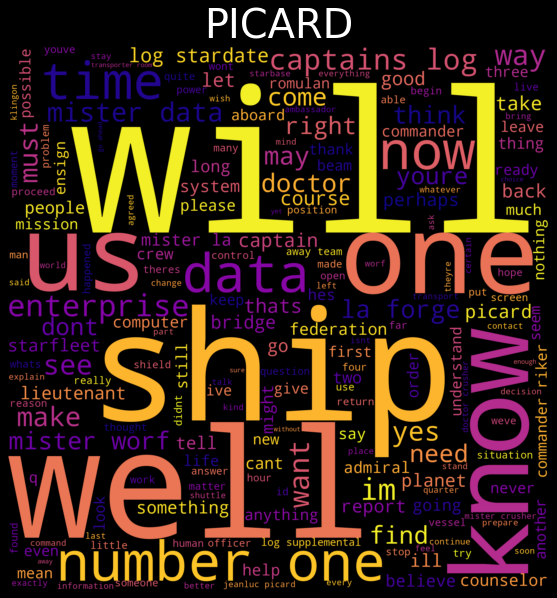

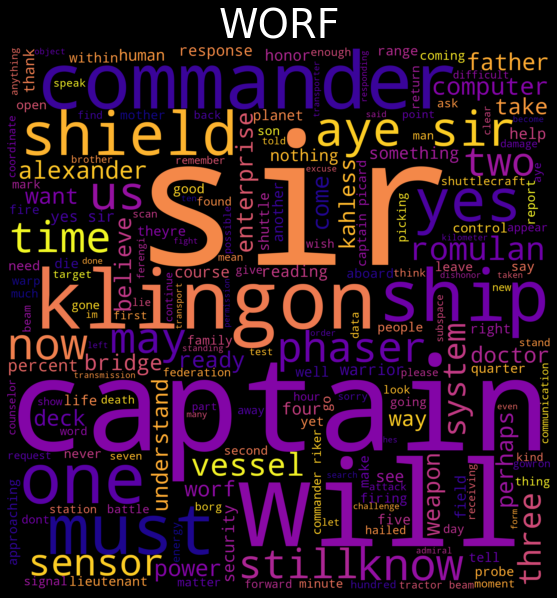

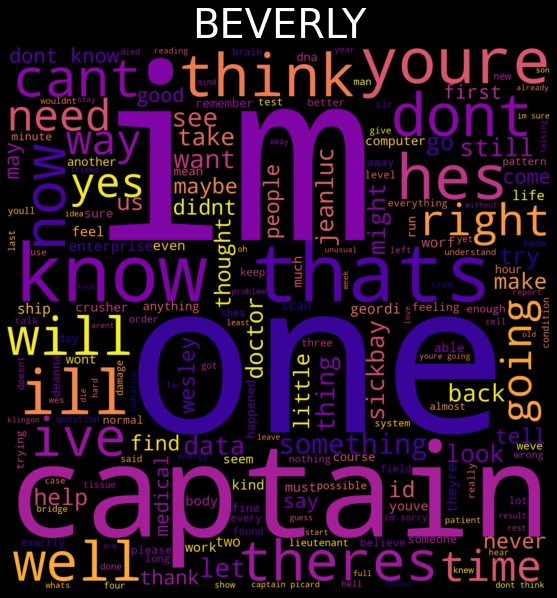

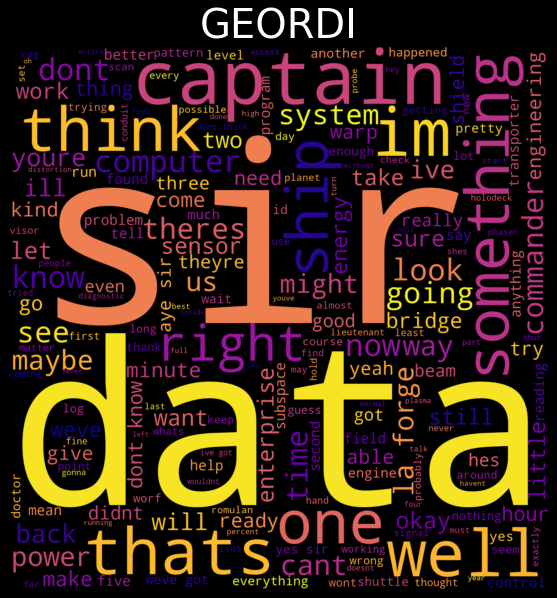

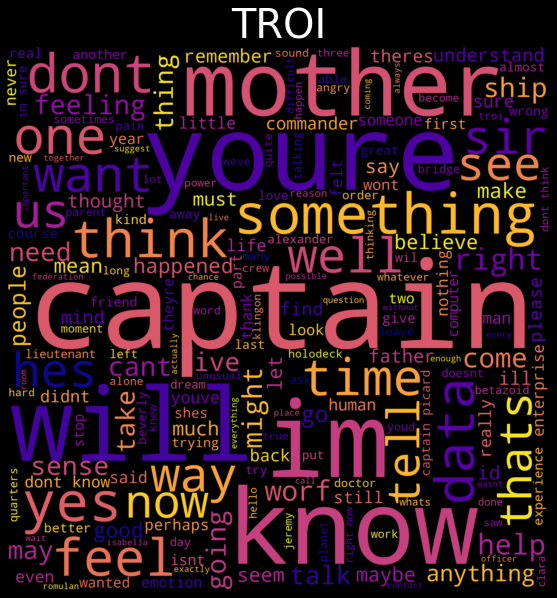

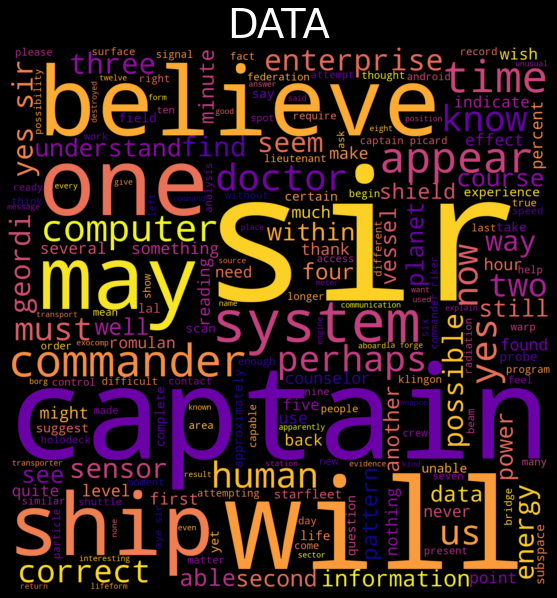

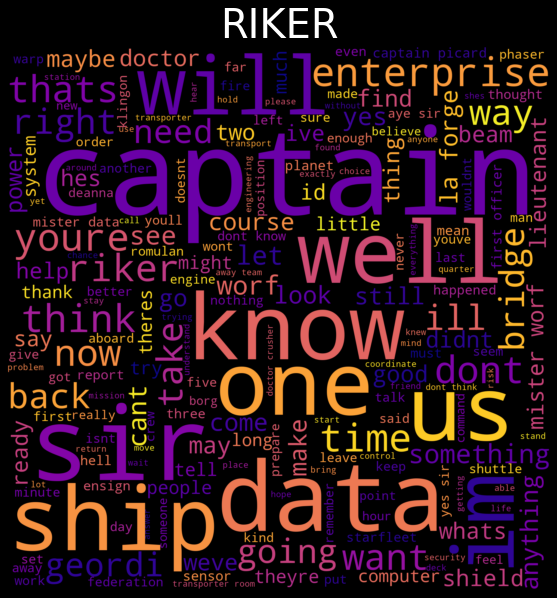

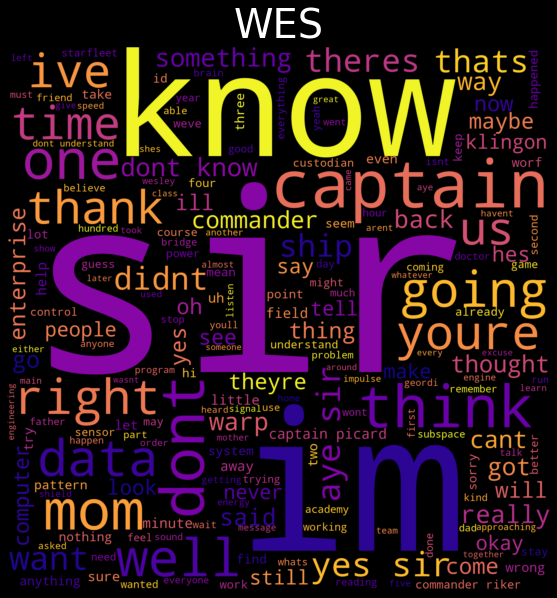

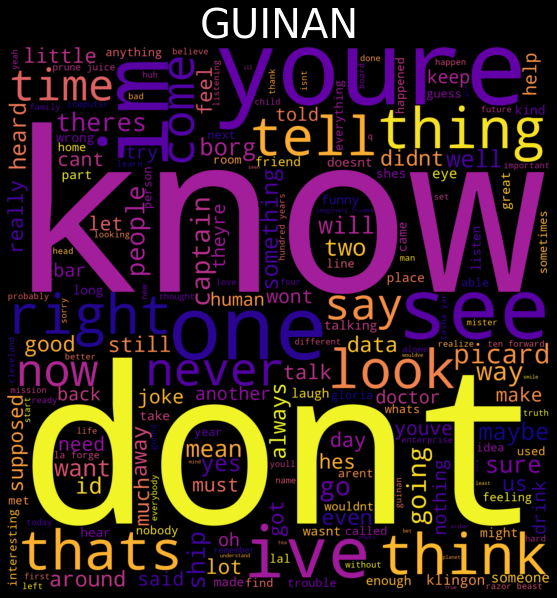

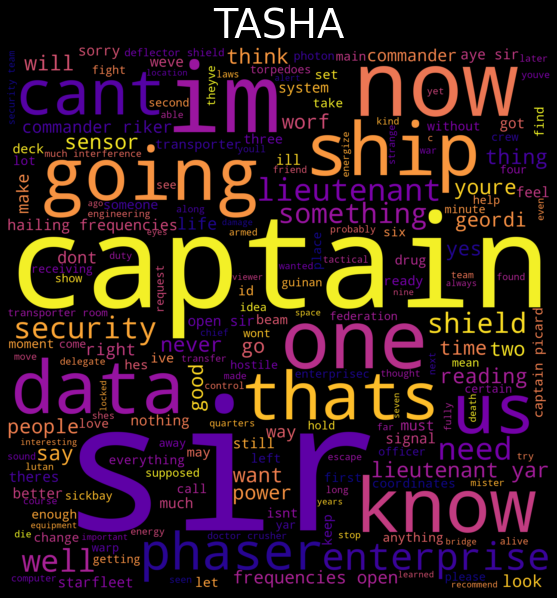

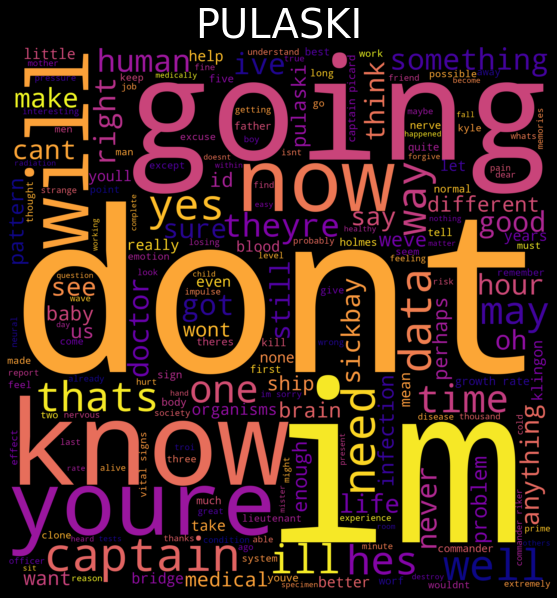

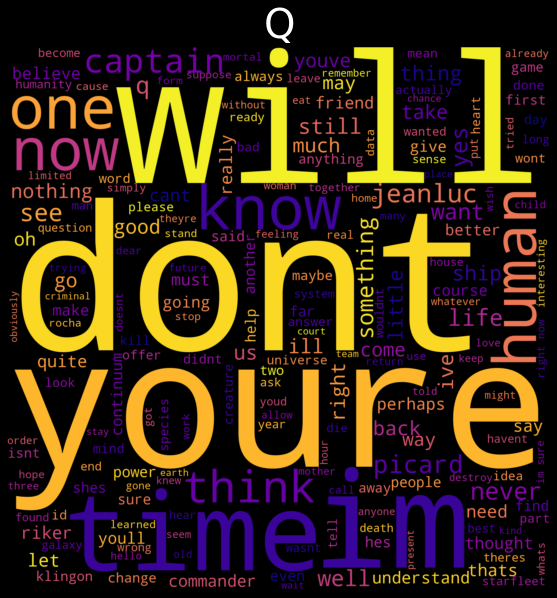

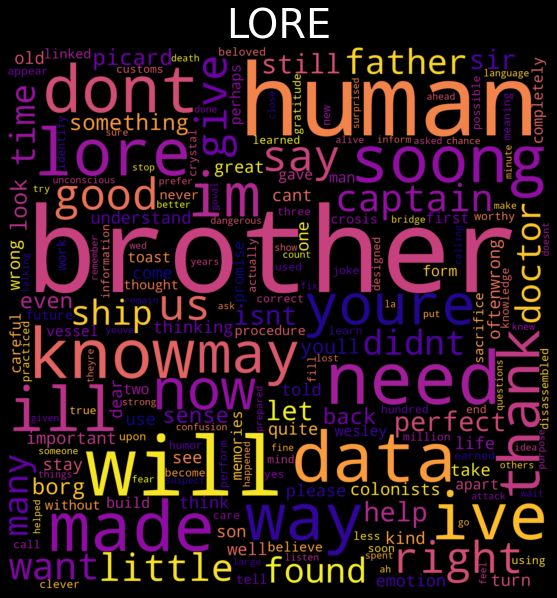

In [37]:
for char in main_cast: 
    
    # selects the filtered dataframe to the character
    StarTrek_Single = StarTrek_df.loc[StarTrek_df['who'] == char]
    
    # select the text data
    text = " ".join(lines for lines in StarTrek_Single.text)
    
    # Create stopword list:
    stopwords = set(STOPWORDS)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color='black', mode="RGBA", width=2000, height=2000, colormap='plasma').generate(text)

    # display the images 
    fig = plt.figure(figsize=(10,10))
    fig.patch.set_facecolor('black')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(char, size=40, color='white')
    plt.axis("off")
    plt.show()
  

#### Most Common Words
Now that we've visualized what these characters said the most across the whole series, let's look into more interesting tidbits about this dataset. Namely, let's narrow down how often these words are mentioned across the whole corpus. 

In [38]:
#We can then use count the most common words in our corpus

#split the words, separate by space '_' and get the top 15 most common words.
text_most_common = Counter(" ".join(body).split()).most_common(15) 
# getting the word(s)
text_mc_word = [text_most_common[i][0] for i in range(len(text_most_common))]
# obtain the frequency
text_mc_freq = [text_most_common[i][1] for i in range(len(text_most_common))]

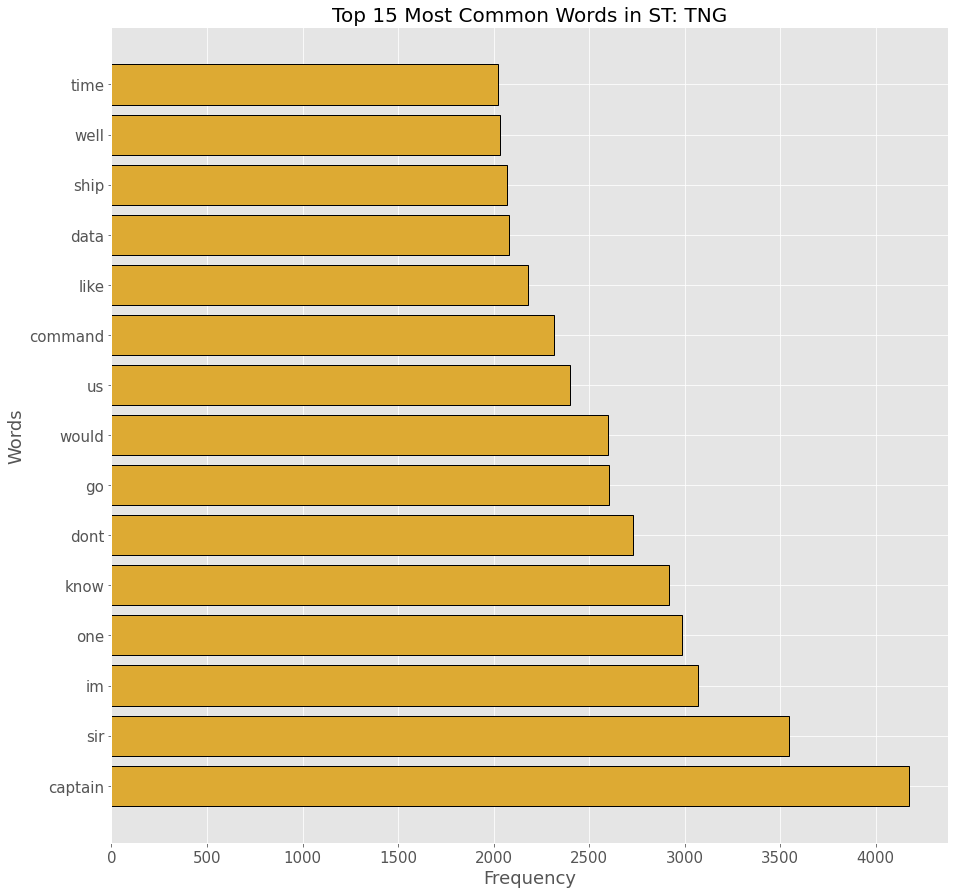

In [39]:
# plotting the most common words said across the whole corpus
plt.figure(figsize = (15,15))
#plot barh of the words, and their highest frequency
plt.barh(text_mc_word, text_mc_freq, color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.xlabel('Frequency', size=18)
plt.xticks(size=15)
plt.ylabel('Words', size=18)
plt.yticks(size=15)
plt.title("Top 15 Most Common Words in ST: TNG", size=20)
plt.show()

The top 15 words are not so surprising. Every ship has its Captain, and these words fit within the realm of what's to be expected from a SciFi show that takes place with a sparefaring crew of people. 

Let's get some more interesting information, when did the show start and end? 

In [40]:
# get the min and max (start and end dates) for the corpus of episodes
print(f"The series started on: {StarTrek_df['Released'].min()}")
print(f"The series ended on: {StarTrek_df['Released'].max()}")

The series started on: 1987-09-26 00:00:00
The series ended on: 1995-08-23 00:00:00


What were the lowest and highest ratings received on IMDB? 

In [41]:
# the lowest and highest score for imdbRating
print(f"The lowest score received is: {StarTrek_df['imdbRating'].min()}")
print(f"The highest score received is: {StarTrek_df['imdbRating'].max()}")

The lowest score received is: 3.4
The highest score received is: 9.3


#### Rating Distribution
We'll be plotting a distribution of the ratings, as well as a time series of the entire series with the ratings plotted. 

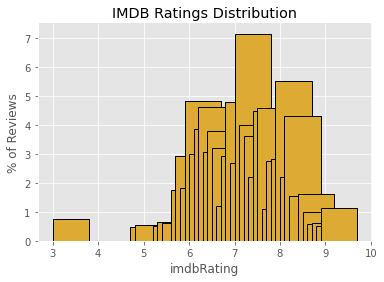

In [42]:
# looking at the distribution of the IMDB Ratings
values, counts = np.unique(StarTrek_df['imdbRating'], return_counts=True)
normalized_reviews = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_reviews * 100, color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.xlabel('imdbRating')
plt.ylabel('% of Reviews')
sns.despine()
plt.title("IMDB Ratings Distribution")
plt.savefig("IMDB Ratings Distribution")
plt.show()

The distribution of the ratings on this dataset show a normally distributed plot. There seems to be one episode that has a rating of 3. This will be considered an outlier. As a whole, the distribution is great to work with for modelling. 

There is one episode that has the lowest rating of 3, which isn't enough data for carry with us to the modelling stage. Even though there is another episode within the realm of a rating of 5, we'll be keeping it because it's closer to the main group of ratings, and the rating of 3 is too far from the normal distribution of the others. 

In [43]:
StarTrek_df.loc[StarTrek_df['imdbRating'] < 4 ]

episode  Episode  Season   Released      who  \
18107  shades of gray       22       2 1989-07-15   GEORDI   
18108  shades of gray       22       2 1989-07-15    RIKER   
18109  shades of gray       22       2 1989-07-15   GEORDI   
18110  shades of gray       22       2 1989-07-15    RIKER   
18111  shades of gray       22       2 1989-07-15   GEORDI   
...               ...      ...     ...        ...      ...   
18614  shades of gray       22       2 1989-07-15    RIKER   
18615  shades of gray       22       2 1989-07-15  PULASKI   
18616  shades of gray       22       2 1989-07-15    RIKER   
18617  shades of gray       22       2 1989-07-15   PICARD   
18618  shades of gray       22       2 1989-07-15     DATA   

                                                    text  imdbRating  \
18107                                          commander         3.4   
18108                                im over here geordi         3.4   
18109                                        whats wrong         3.4   
18110                    something jabbed me in the calf         3.4   
18111   obrien  commander rikers been injured  lock o...         3.4   
...                                                  ...         ...   
18614                                    why i feel fine         3.4   
18615   there may be some residual memory loss i just...         3.4   
18616   of course i know who i am im captain jeanluc ...         3.4   
18617   delighted youre feeling better captain the ad...         3.4   
18618   sir i do not believe you have the authority t...         3.4   

       Word_Count  
18107           1  
18108           4  
18109           2  
18110           6  
18111          11  
...           ...  
18614           4  
18615          19  
18616          15  
18617          13  
18618          17  

[512 rows x 8 columns]

In [44]:
# dropping the rows that contain an imdb rating less than 4 by the index placements
StarTrek_df.drop(StarTrek_df.loc[18107:18618].index, inplace=True)

In [45]:
# sanity check
StarTrek_df.loc[StarTrek_df['imdbRating'] < 4]

Empty DataFrame
Columns: [episode, Episode, Season, Released, who, text, imdbRating, Word_Count]
Index: []

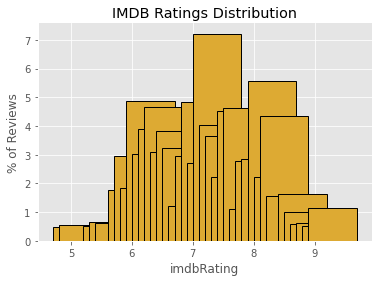

In [46]:
# looking at the distribution of the IMDB Ratings
values, counts = np.unique(StarTrek_df['imdbRating'], return_counts=True)
normalized_reviews = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_reviews * 100, color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.xlabel('imdbRating')
plt.ylabel('% of Reviews')
sns.despine()
plt.title("IMDB Ratings Distribution")
plt.savefig("IMDB Ratings Distribution")
plt.show()

Our distribution of the ratings looks very nice, and we can trust in moving forward in using these ratings for the modelling stage. 

#### Time Series of Ratings 
Let's see how the ratings perform across time, as the show as been around for several seasons. 

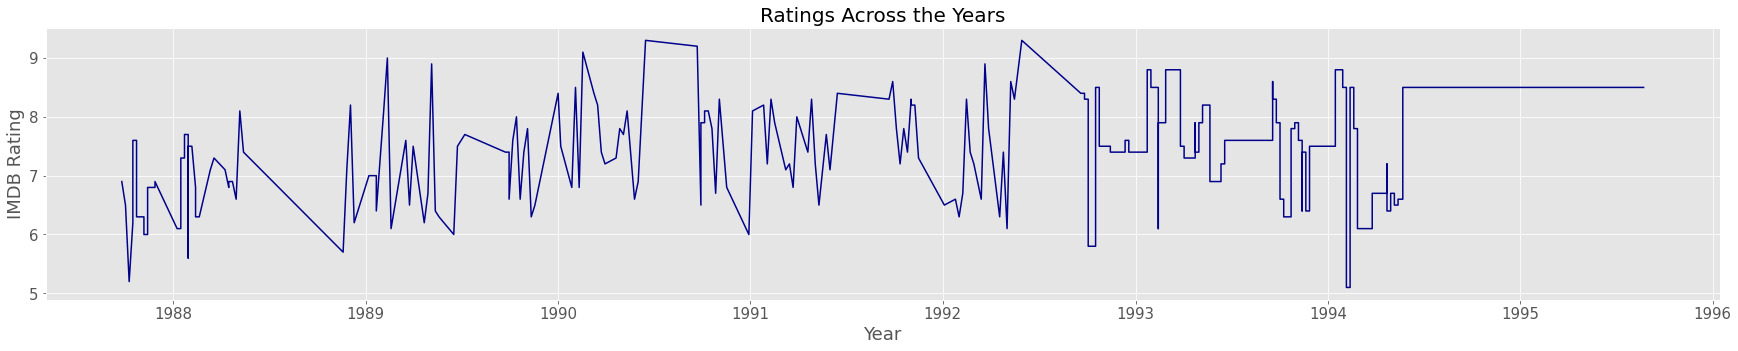

In [47]:
#plot the ratings count over the years
plt.figure(figsize = (30,5))
plt.plot(sorted(StarTrek_df['Released']), StarTrek_df['imdbRating'], color='darkblue')
plt.xlabel('Year', size=18)
plt.xticks(size=15)
plt.ylabel('IMDB Rating', size=18)
plt.yticks(size=15)
plt.title('Ratings Across the Years', size=20)
plt.show()


Let's take a closer look at the overall summary of the dataframe so far, and draw inspiration from and find more visualizations.

In [48]:
StarTrek_df.describe()

Episode        Season    imdbRating    Word_Count
count  67120.000000  67120.000000  67120.000000  67120.000000
mean      13.152190      4.040629      7.352616     11.319234
std        7.373287      2.004748      0.868155     10.248759
min        1.000000      1.000000      5.100000      1.000000
25%        7.000000      2.000000      6.600000      4.000000
50%       13.000000      4.000000      7.400000      8.000000
75%       19.000000      6.000000      8.000000     15.000000
max       26.000000      7.000000      9.300000    372.000000

#### Line Length Counts

I'm curious to know how many words are said in each line, and how often does it happen? We'll plot a bar chart to show us the frequency of these lines, separated by bins of 5 (as the average of words per line is around 11). 

Text(0, 0.5, 'Total Number of Lines')

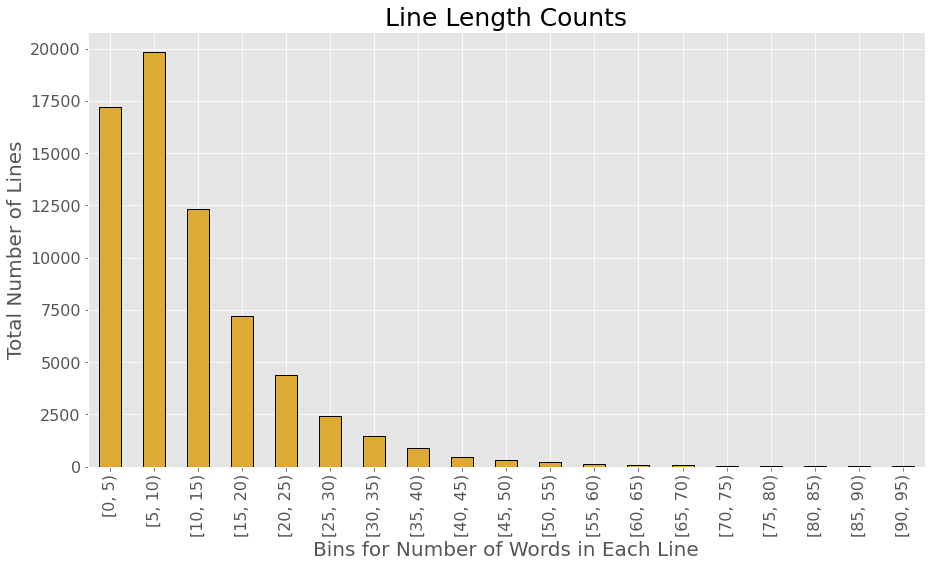

In [49]:
# the distribution of length of lines
fig = plt.figure(figsize=(15,8))
# taking steps of 5 
step = 5
# range up 100 words in one line
bin_range = np.arange(0, 100, step)
#cutting up the word counts into bins 
out, bins  = pd.cut(StarTrek_df['Word_Count'], bins=bin_range, include_lowest=True, right=False, retbins=True)
# sort by the values
out.value_counts(sort=False).plot.bar(color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.title('Line Length Counts', size=25)
plt.tick_params(labelsize=16)
plt.xlabel('Bins for Number of Words in Each Line', size=20)
plt.ylabel('Total Number of Lines', size=20)

Across the whole corpus, there's a very small amount of long lines from the script. This suggests to me that there aren't that many monologues in the show. I wonder if we can expand this information further. 

In [50]:
# for reference
StarTrek_df.head()

episode  Episode  Season   Released     who  \
0  encounter at farpoint        1       1 1987-09-26  PICARD   
1  encounter at farpoint        1       1 1987-09-26  PICARD   
2  encounter at farpoint        1       1 1987-09-26  PICARD   
3  encounter at farpoint        1       1 1987-09-26  PICARD   
4  encounter at farpoint        1       1 1987-09-26  PICARD   

                                                text  imdbRating  Word_Count  
0   captains log stardate  our destination is pla...         6.9          19  
1   my orders are to examine farpoint a starbase ...         6.9          17  
2   acquainted with my new command this galaxy cl...         6.9          10  
3   i am still somewhat in awe of its size and co...         6.9          11  
4                several key positions most notably          6.9           5

In [51]:
print('Average Words Per Line:', round(StarTrek_df['Word_Count'].mean(), 2))
print('Lines Containing More than 100 Words: ', StarTrek_df[StarTrek_df['Word_Count'] >= 100].Word_Count.count())
print('\n')
print('Characters With More than 100 lines:')
print(StarTrek_df[StarTrek_df['Word_Count'] >= 100][['who', 'episode', 'Word_Count']])

Average Words Per Line: 11.32
Lines Containing More than 100 Words:  24


Characters With More than 100 lines:
           who               episode  Word_Count
8274     TASHA          skin of evil         100
9544    PICARD      the neutral zone         114
11516    OTHER  the outrageous okona         101
13111   PICARD  the measure of a man         116
13177   PICARD  the measure of a man         140
14234    RIKER            the royale         163
15002   PICARD     the icarus factor         115
16184   PICARD       samaritan snare         130
22254    OTHER          the defector         100
24787     DATA         the offspring         144
25545   PICARD            allegiance         103
29668    OTHER              brothers         100
30123    OTHER                family         372
38017   PICARD            redemption         111
38054   PICARD            redemption         108
39130    OTHER             ensign ro         165
41513   PICARD      a matter of time         102
44462  

It would seem that Picard has a LOT of monologues. Let's see what the total lines per episode is, rather than across the whole dataset. After creating this dataframe, we'll plot this information more clearly. 

#### Total Lines per Episode

--- **NOTE** --- 

**The episode order is now in alphabetical order as a result of the `groupby()`, the `Episode` is inaccurate. However, we can reference the table above to see more information in regards to the episode name (as well as the total word count).** 

In [52]:
# getting episode info for lines spoke by episode

ST_sorted = StarTrek_df.groupby('episode').count().reset_index()
ST_sorted.head(10)

episode  Episode  Season  Released  who  text  imdbRating  \
0                 11001001      426     426       426  426   426         426   
1       a fistful of datas      302     302       302  302   302         302   
2        a matter of honor      367     367       367  367   367         367   
3  a matter of perspective      373     373       373  373   373         373   
4         a matter of time      393     393       393  393   393         393   
5       all good things...      834     834       834  834   834         834   
6               allegiance      409     409       409  409   409         409   
7                angel one      354     354       354  354   354         354   
8                   aquiel      332     332       332  332   332         332   
9                 attached      373     373       373  373   373         373   

   Word_Count  
0         426  
1         302  
2         367  
3         373  
4         393  
5         834  
6         409  
7         354  
8         332  
9         373

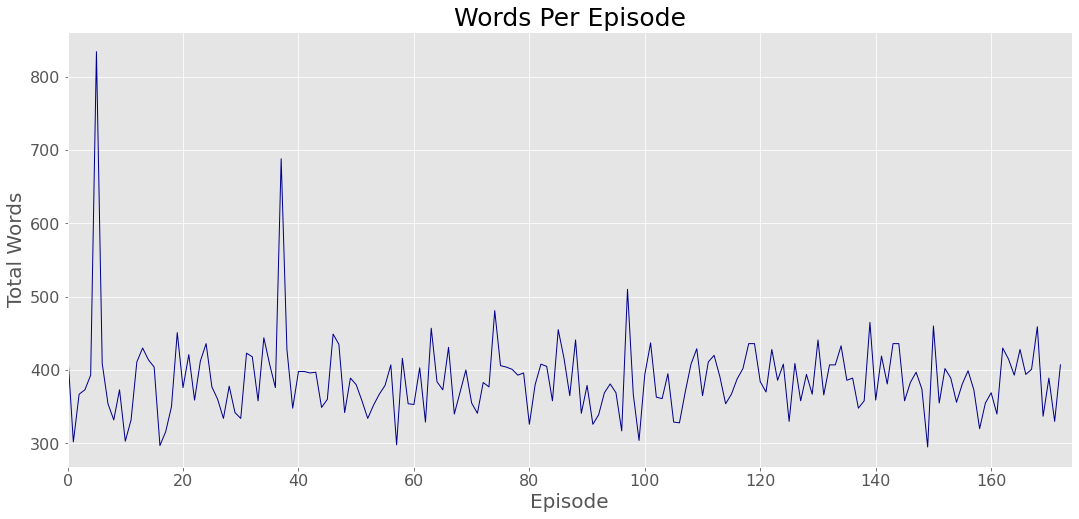

In [53]:
#instantiate the plot
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)
# sorted by the episode level 
ax.plot(ST_sorted.Word_Count, color='darkblue', linewidth=1)
ax.set_title('Words Per Episode', size=25)
ax.tick_params(labelsize=16)
ax.set_xlabel('Episode', size=20)
ax.set_ylabel('Total Words', size=20)
ax.set_xlim((0, 174))
plt.show()

We can see that a particular episode ('All Good Things...') has 834 words, this makes complete sense because this episode is the series finale, where plenty of monologues were had. 

#### Total Words Spoken with IMDB Rating
Now, let's see if we can plot this information with the IMDB Rating. 

In [54]:
StarTrek_df

episode  Episode  Season   Released     who  \
0      encounter at farpoint        1       1 1987-09-26  PICARD   
1      encounter at farpoint        1       1 1987-09-26  PICARD   
2      encounter at farpoint        1       1 1987-09-26  PICARD   
3      encounter at farpoint        1       1 1987-09-26  PICARD   
4      encounter at farpoint        1       1 1987-09-26  PICARD   
...                      ...      ...     ...        ...     ...   
67628     all good things...       25       7 1994-05-23    DATA   
67629     all good things...       25       7 1994-05-23  PICARD   
67630     all good things...       25       7 1994-05-23  PICARD   
67631     all good things...       25       7 1994-05-23    TROI   
67632     all good things...       25       7 1994-05-23  PICARD   

                                                    text  imdbRating  \
0       captains log stardate  our destination is pla...         6.9   
1       my orders are to examine farpoint a starbase ...         6.9   
2       acquainted with my new command this galaxy cl...         6.9   
3       i am still somewhat in awe of its size and co...         6.9   
4                    several key positions most notably          6.9   
...                                                  ...         ...   
67628                             would you care to deal         8.5   
67629                                       oh thank you         8.5   
67630   i should have done this a long time ago i was...         8.5   
67631                            you were always welcome         8.5   
67632   so five card stud nothing wild the skys the l...         8.5   

       Word_Count  
0              19  
1              17  
2              10  
3              11  
4               5  
...           ...  
67628           5  
67629           3  
67630          20  
67631           4  
67632          10  

[67120 rows x 8 columns]

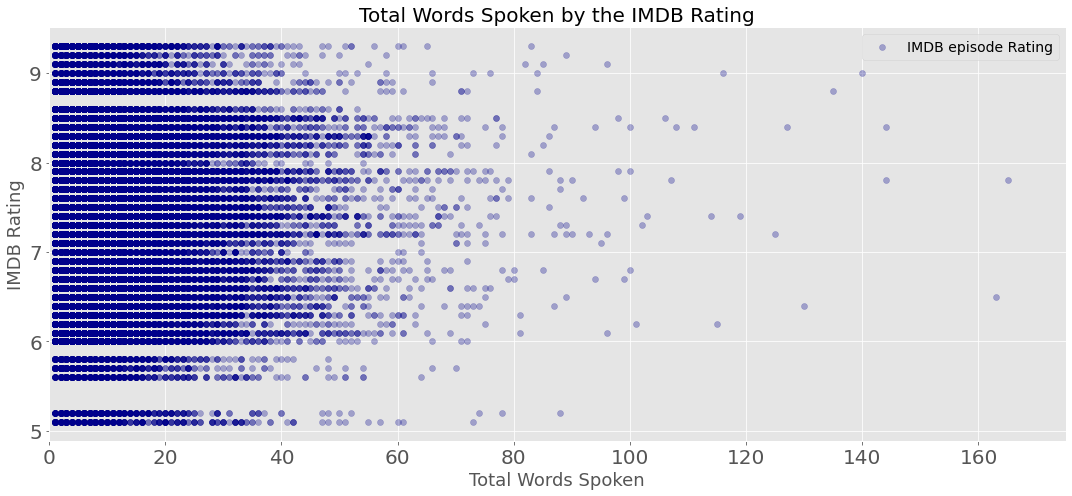

In [55]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
# scatter plot of the word counts with the imdb ratings
ax.scatter(StarTrek_df.Word_Count, StarTrek_df.imdbRating,  alpha = .3, label='IMDB episode Rating', color = 'darkblue')
ax.tick_params(labelsize=10)
ax.set_title('Total Words Spoken by the IMDB Rating', size=20)
ax.set_xlabel('Total Words Spoken', size=18)
ax.set_xlim((0,175))
ax.tick_params(labelsize=20)
ax.set_ylabel('IMDB Rating', size = 18)
plt.legend(prop={'size':14})
plt.tight_layout()
plt.show()


## Prep for Modelling / Feature Engineering

Now that we have officially cleaned and organized our data, now we'll have to create new dataframes for modelling. Since there up to several hundred different characters across the show, and because they only appear once or twice at most, they are aren't contributing as much to the model. We are filtering the spoken words to only the main cast and some recurring villians. 

We're creating a new DataFrame entirely based on each of the main characters, grouped on the episode name, where we learn how many words each character spoke in the given episode. It'll also contain our `imdbRatings` column as well. Let's take a quick look at our original cleaned dataset for reference. 

In [56]:
# quick look
StarTrek_df.head()

episode  Episode  Season   Released     who  \
0  encounter at farpoint        1       1 1987-09-26  PICARD   
1  encounter at farpoint        1       1 1987-09-26  PICARD   
2  encounter at farpoint        1       1 1987-09-26  PICARD   
3  encounter at farpoint        1       1 1987-09-26  PICARD   
4  encounter at farpoint        1       1 1987-09-26  PICARD   

                                                text  imdbRating  Word_Count  
0   captains log stardate  our destination is pla...         6.9          19  
1   my orders are to examine farpoint a starbase ...         6.9          17  
2   acquainted with my new command this galaxy cl...         6.9          10  
3   i am still somewhat in awe of its size and co...         6.9          11  
4                several key positions most notably          6.9           5

We'll need to round up our `imdbRating` column for our models to work more smoothly. 


In [57]:
# rounding the imdb rating to ensure accuracy of the data
StarTrek_df['imdbRating'] = round(StarTrek_df['imdbRating'])


# sanity check
StarTrek_df.head()

episode  Episode  Season   Released     who  \
0  encounter at farpoint        1       1 1987-09-26  PICARD   
1  encounter at farpoint        1       1 1987-09-26  PICARD   
2  encounter at farpoint        1       1 1987-09-26  PICARD   
3  encounter at farpoint        1       1 1987-09-26  PICARD   
4  encounter at farpoint        1       1 1987-09-26  PICARD   

                                                text  imdbRating  Word_Count  
0   captains log stardate  our destination is pla...         7.0          19  
1   my orders are to examine farpoint a starbase ...         7.0          17  
2   acquainted with my new command this galaxy cl...         7.0          10  
3   i am still somewhat in awe of its size and co...         7.0          11  
4                several key positions most notably          7.0           5

### Create Columns/Character

Now that we've created our list of characters (`main_cast`), we're creating a loop where: 

1. Filters down to the character chosen (in the list) 
2. Create a new individual column per character where it's their share of the `Word_Count` column
3. Group by the episode name
4. Appended the results to the list 

In [58]:
df_list = [] 

for character in main_cast:
    
    #filter to only the characters in the list
    StarTrek_Char = StarTrek_df.loc[StarTrek_df['who'] == character]
    
    #make a new column for each character's word count
    StarTrek_Char[character] = StarTrek_Char['Word_Count']
    
    #sum up the characters word counts for the specific episode 
    StarTrek_Char = StarTrek_Char.groupby(['episode'])[character].sum()
    
    #append results to the list, df_list
    df_list.append(StarTrek_Char)
    


In [59]:
# quick look
df_list

[episode
 11001001                        1067
 a fistful of datas               271
 a matter of honor                648
 a matter of perspective         1191
 a matter of time                1369
                                 ... 
 when the bough breaks           1015
 where no one has gone before    1261
 where silence has lease         1105
 who watches the watchers         907
 yesterday's enterprise          1124
 Name: PICARD, Length: 173, dtype: int64,
 episode
 11001001                         54
 a fistful of datas              601
 a matter of honor               204
 a matter of perspective          59
 a matter of time                175
                                ... 
 when the bough breaks            39
 where no one has gone before     32
 where silence has lease         226
 who watches the watchers         32
 yesterday's enterprise           62
 Name: WORF, Length: 171, dtype: int64,
 episode
 11001001                         136
 a fistful of datas         

We have our list of characters paired with their word count totals for each episode! Now, we need to reduce this list into a DataFrame where they're joined on the `episode` column. There should be only the `episode` (as the index), and the columns for each character with their total word count for that particular episode in the row. 

You might notice that the `episode` content is no longer in the serialized order of appearance. This is okay, and insignificant to our modelling purposes, as we are only interested in the`imdbRating` column as our dependent variable in the future. We care about the content per episode, not the order. 

Now we're going to convert our list into a dataframe on the `episode` column. 

In [60]:
# reducing the list into a table
WordCount_Char = reduce(lambda left, right:pd.merge(left, right, on=['episode'], how='outer'), df_list)

In [61]:
# sanity check
WordCount_Char.head()

PICARD   WORF  BEVERLY  GEORDI   TROI   DATA  RIKER  \
episode                                                                        
11001001                   1067   54.0    136.0   166.0    NaN  333.0   1007   
a fistful of datas          271  601.0    100.0   350.0  353.0  616.0     71   
a matter of honor           648  204.0      NaN     NaN    NaN  187.0   1014   
a matter of perspective    1191   59.0     28.0   498.0   94.0  353.0    741   
a matter of time           1369  175.0    179.0   554.0   76.0  617.0    318   

                           WES  GUINAN  TASHA  PULASKI      Q  LORE  
episode                                                              
11001001                 144.0     NaN   89.0      NaN  193.0   NaN  
a fistful of datas         NaN     NaN    NaN      NaN    NaN   NaN  
a matter of honor        242.0     NaN    NaN     77.0    NaN   NaN  
a matter of perspective   80.0     NaN    NaN      NaN    NaN   NaN  
a matter of time           NaN     NaN    NaN      NaN    NaN   NaN

### Imputing Missing Values

We've successfully created our table! We have all the characters as their individual columns with their total word counts. However, we can see that there are some missing values immediately. This would make sense because not all of the characters appeared in every episode (for example, Q and Lore, who are recurring villians). We'll need to impute a 0 where there is a NaN. Let's look at all the missing rows. 

In [62]:
# show missing rows
WordCount_Char[WordCount_Char.isna().any(axis=1)]

PICARD   WORF  BEVERLY  GEORDI   TROI   DATA  \
episode                                                                      
11001001                        1067   54.0    136.0   166.0    NaN  333.0   
a fistful of datas               271  601.0    100.0   350.0  353.0  616.0   
a matter of honor                648  204.0      NaN     NaN    NaN  187.0   
a matter of perspective         1191   59.0     28.0   498.0   94.0  353.0   
a matter of time                1369  175.0    179.0   554.0   76.0  617.0   
...                              ...    ...      ...     ...    ...    ...   
when the bough breaks           1015   39.0    336.0    70.0   43.0  184.0   
where no one has gone before    1261   32.0     70.0   114.0  117.0  131.0   
where silence has lease         1105  226.0      NaN   109.0  119.0  463.0   
who watches the watchers         907   32.0    138.0    47.0  177.0  135.0   
yesterday's enterprise          1124   62.0    101.0   167.0    NaN  404.0   

                              RIKER    WES  GUINAN  TASHA  PULASKI      Q  \
episode                                                                     
11001001                       1007  144.0     NaN   89.0      NaN  193.0   
a fistful of datas               71    NaN     NaN    NaN      NaN    NaN   
a matter of honor              1014  242.0     NaN    NaN     77.0    NaN   
a matter of perspective         741   80.0     NaN    NaN      NaN    NaN   
a matter of time                318    NaN     NaN    NaN      NaN    NaN   
...                             ...    ...     ...    ...      ...    ...   
when the bough breaks           437  597.0     NaN   40.0      NaN    NaN   
where no one has gone before    517  150.0     NaN   59.0      NaN    NaN   
where silence has lease         623  127.0     NaN    NaN    171.0    NaN   
who watches the watchers        271    NaN     NaN    NaN      NaN    NaN   
yesterday's enterprise          390  110.0   368.0  778.0      NaN    NaN   

                              LORE  
episode                             
11001001                       NaN  
a fistful of datas             NaN  
a matter of honor              NaN  
a matter of perspective        NaN  
a matter of time               NaN  
...                            ...  
when the bough breaks          NaN  
where no one has gone before   NaN  
where silence has lease        NaN  
who watches the watchers       NaN  
yesterday's enterprise         NaN  

[173 rows x 13 columns]

In [63]:
# replacing missing values with 0
WordCount_Char.fillna(0, inplace=True)

In [64]:
# checking for more missing values
WordCount_Char.isna().sum()

PICARD     0
WORF       0
BEVERLY    0
GEORDI     0
TROI       0
DATA       0
RIKER      0
WES        0
GUINAN     0
TASHA      0
PULASKI    0
Q          0
LORE       0
dtype: int64

We've correctly replaced all the of missing values with a zero, now we'll have to reset the index because the `episode` is currently our index, which is not optimal for modelling or EDA. 

In [65]:
# resetting the index
WordCount_Char.reset_index(level=0, inplace=True)

In [66]:
# sanity check
WordCount_Char.head()

episode  PICARD   WORF  BEVERLY  GEORDI   TROI   DATA  \
0                 11001001    1067   54.0    136.0   166.0    0.0  333.0   
1       a fistful of datas     271  601.0    100.0   350.0  353.0  616.0   
2        a matter of honor     648  204.0      0.0     0.0    0.0  187.0   
3  a matter of perspective    1191   59.0     28.0   498.0   94.0  353.0   
4         a matter of time    1369  175.0    179.0   554.0   76.0  617.0   

   RIKER    WES  GUINAN  TASHA  PULASKI      Q  LORE  
0   1007  144.0     0.0   89.0      0.0  193.0   0.0  
1     71    0.0     0.0    0.0      0.0    0.0   0.0  
2   1014  242.0     0.0    0.0     77.0    0.0   0.0  
3    741   80.0     0.0    0.0      0.0    0.0   0.0  
4    318    0.0     0.0    0.0      0.0    0.0   0.0

I'm curious to know what were the total number of words said per character.

In [67]:
sum_ST = pd.DataFrame(WordCount_Char,columns=['PICARD','WORF', 'BEVERLY', 'GEORDI', 'TROI',  'DATA', 'RIKER', 'Q', 'LORE', 'WES', 'GUINAN', 'TASHA', 'PULASKI'])
sum_column = sum_ST.sum(axis=0)

sum_column

PICARD     155742.0
WORF        34647.0
BEVERLY     42687.0
GEORDI      54854.0
TROI        37744.0
DATA        85751.0
RIKER       71187.0
Q           13934.0
LORE         2361.0
WES         13528.0
GUINAN       5874.0
TASHA        5562.0
PULASKI      5046.0
dtype: float64

I took this information and created a csv, and reimported it here. 

In [68]:
total_word_char = pd.read_csv(r"C:\Users\Katya\Documents\GitHub\Capstone-Project---BrainStation\total_word_count.csv")

total_word_char

Picard   Data  Riker  Geordi  Beverly   Troi   Worf     Q     Wes  Guinan  \
0  155742  85751  71187   54854    42687  37744  34647  13934  13528    5874   

   Tasha  Pulaski  Lore  
0   5562     5046  2361

Now let's plot a bar chart depicting the word count totals for each character. 

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

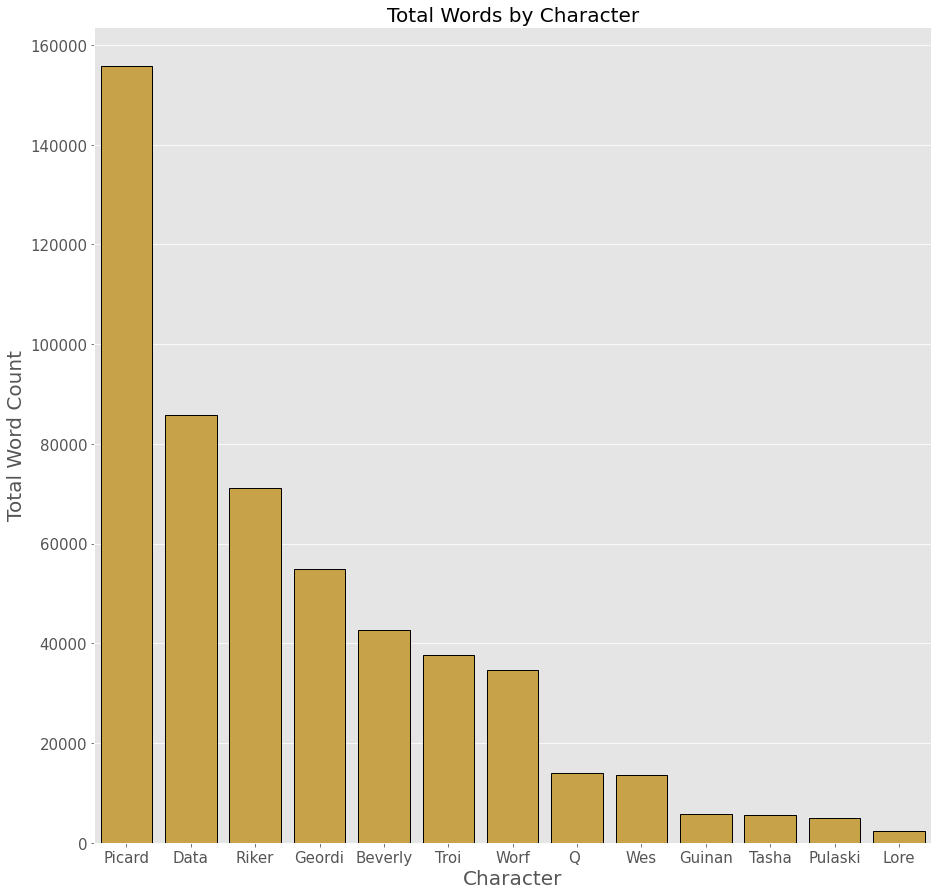

In [69]:
plt.figure(figsize =(15,15))
sns.barplot(data=total_word_char, color='#ddaa33', edgecolor = 'black', linewidth=1)
plt.title('Total Words by Character', size = 20)
plt.ylabel('Total Word Count', size=20)
plt.xlabel('Character', size=20)
plt.xticks(size=15)
plt.yticks(size=15)


We can see that Picard, Data, and Riker hold the top spoken words in the whole show, I wonder if this fact contributes positively toward the IMDB rating? 

With our index correct now, we can continue with some more feature engineering. We can see that each column has the total words per character, but we don't have a total words for the whole roster. So, we'll created a `Total_Word_Count` column that adds up all the characters that we have. 

In [70]:
# getting the total word count for each episode
WordCount_Char['Total_Word_Count'] = WordCount_Char.sum(axis=1)                     

In [71]:
# sanity check
WordCount_Char.sample(10)

episode  PICARD   WORF  BEVERLY  GEORDI   TROI    DATA  \
155             time squared    1333  198.0      0.0   498.0  251.0   247.0   
5         all good things...    3843  452.0   1130.0   730.0  480.0  1382.0   
54                     haven     798   10.0    115.0    96.0  619.0   150.0   
35     elementary, dear data     582   48.0      0.0  1022.0   69.0  1418.0   
63          imaginary friend     592  118.0     73.0   610.0  649.0   385.0   
84                 phantasms     738   99.0    271.0   864.0  444.0  1154.0   
48             frame of mind     332  194.0    441.0    17.0  253.0    94.0   
12                bloodlines    1890  123.0    378.0   369.0  107.0   552.0   
134  the masterpiece society     999   54.0     21.0   669.0  583.0   103.0   
93                    relics     653  100.0     78.0  1007.0  149.0   644.0   

     RIKER  WES  GUINAN  TASHA  PULASKI      Q  LORE  Total_Word_Count  
155    762  0.0     0.0    0.0    477.0    0.0   0.0            3766.0  
5      597  0.0     0.0  249.0      0.0  924.0   0.0            9787.0  
54     217  0.0     0.0  113.0      0.0    0.0   0.0            2118.0  
35      63  0.0     0.0    0.0    563.0    0.0   0.0            3765.0  
63     108  0.0   441.0    0.0      0.0    0.0   0.0            2976.0  
84     187  0.0     0.0    0.0      0.0    0.0   0.0            3757.0  
48    1555  0.0     0.0    0.0      0.0    0.0   0.0            2886.0  
12     146  0.0     0.0    0.0      0.0    0.0   0.0            3565.0  
134    262  0.0     0.0    0.0      0.0    0.0   0.0            2691.0  
93     265  0.0     0.0    0.0      0.0    0.0   0.0            2896.0

### Convert to Percentage Values

Success. However, having numerical values doesn't correctly portray the significance per character by their total of words. Is 300 words a large portion of the speech said during that episode? 

In order to mitigate this, we'll convert the values into percentages, or more specifically, relative total word count. Our next steps are going to be creating a new group of columns specifically for the percentage values, and then drop the previous version (the total number). What we'll have left is just percentage values, and the total word count for reference. 


In [72]:
# getting the relative word count for each character instead of keeping the absolute values
character_percents = ['PICARD_PCT','WORF_PCT', 'BEVERLY_PCT', 'GEORDI_PCT', 'TROI_PCT',  'DATA_PCT', 'RIKER_PCT', 'WESLEY_PCT','GUINAN_PCT','TASHA_PCT','PULASKI_PCT', 'Q_PCT', 'LORE_PCT']

for index, character in enumerate(main_cast):
    
    # getting the percentage value for each character per episode
    WordCount_Char[character_percents[index]] = round((WordCount_Char[character] / WordCount_Char['Total_Word_Count']*100),2)

In [73]:
# sanity check
WordCount_Char.head()

episode  PICARD   WORF  BEVERLY  GEORDI   TROI   DATA  \
0                 11001001    1067   54.0    136.0   166.0    0.0  333.0   
1       a fistful of datas     271  601.0    100.0   350.0  353.0  616.0   
2        a matter of honor     648  204.0      0.0     0.0    0.0  187.0   
3  a matter of perspective    1191   59.0     28.0   498.0   94.0  353.0   
4         a matter of time    1369  175.0    179.0   554.0   76.0  617.0   

   RIKER    WES  GUINAN  ...  GEORDI_PCT  TROI_PCT  DATA_PCT  RIKER_PCT  \
0   1007  144.0     0.0  ...        5.21      0.00     10.44      31.58   
1     71    0.0     0.0  ...       14.82     14.94     26.08       3.01   
2   1014  242.0     0.0  ...        0.00      0.00      7.88      42.75   
3    741   80.0     0.0  ...       16.36      3.09     11.60      24.34   
4    318    0.0     0.0  ...       16.85      2.31     18.77       9.67   

   WESLEY_PCT  GUINAN_PCT  TASHA_PCT  PULASKI_PCT  Q_PCT  LORE_PCT  
0        4.52         0.0       2.79         0.00   6.05       0.0  
1        0.00         0.0       0.00         0.00   0.00       0.0  
2       10.20         0.0       0.00         3.25   0.00       0.0  
3        2.63         0.0       0.00         0.00   0.00       0.0  
4        0.00         0.0       0.00         0.00   0.00       0.0  

[5 rows x 28 columns]

### Dropping Columns 

We've successfully created our columns with the percentage values, let's redefine this dataframe by dropping the absolute word counts from it. 

In [74]:
Relative_WordCount_Char = WordCount_Char.drop(columns=['PICARD', 'WORF', 'BEVERLY', 'GEORDI', 'TROI', 'DATA', 'RIKER', 'Q', 'LORE', 'WES', 'GUINAN', 'TASHA', 'PULASKI'])

print(Relative_WordCount_Char.shape)
Relative_WordCount_Char.head()

(173, 15)


episode  Total_Word_Count  PICARD_PCT  WORF_PCT  \
0                 11001001            3189.0       33.46      1.69   
1       a fistful of datas            2362.0       11.47     25.44   
2        a matter of honor            2372.0       27.32      8.60   
3  a matter of perspective            3044.0       39.13      1.94   
4         a matter of time            3288.0       41.64      5.32   

   BEVERLY_PCT  GEORDI_PCT  TROI_PCT  DATA_PCT  RIKER_PCT  WESLEY_PCT  \
0         4.26        5.21      0.00     10.44      31.58        4.52   
1         4.23       14.82     14.94     26.08       3.01        0.00   
2         0.00        0.00      0.00      7.88      42.75       10.20   
3         0.92       16.36      3.09     11.60      24.34        2.63   
4         5.44       16.85      2.31     18.77       9.67        0.00   

   GUINAN_PCT  TASHA_PCT  PULASKI_PCT  Q_PCT  LORE_PCT  
0         0.0       2.79         0.00   6.05       0.0  
1         0.0       0.00         0.00   0.00       0.0  
2         0.0       0.00         3.25   0.00       0.0  
3         0.0       0.00         0.00   0.00       0.0  
4         0.0       0.00         0.00   0.00       0.0

Let's change the order of columns here, so it's a little more readable as well as renaming some of the columns that it's consistent throughout. 

In [75]:
# changing the order of columns
Relative_WordCount_Char = Relative_WordCount_Char[['episode', 'PICARD_PCT', 'RIKER_PCT', 'DATA_PCT', 'WORF_PCT', 'TROI_PCT','BEVERLY_PCT', 'GEORDI_PCT', 'Q_PCT', 'LORE_PCT' ,'WESLEY_PCT', 'GUINAN_PCT', 'TASHA_PCT', 'PULASKI_PCT', 'Total_Word_Count']]

#sanity check
Relative_WordCount_Char.head()

episode  PICARD_PCT  RIKER_PCT  DATA_PCT  WORF_PCT  \
0                 11001001       33.46      31.58     10.44      1.69   
1       a fistful of datas       11.47       3.01     26.08     25.44   
2        a matter of honor       27.32      42.75      7.88      8.60   
3  a matter of perspective       39.13      24.34     11.60      1.94   
4         a matter of time       41.64       9.67     18.77      5.32   

   TROI_PCT  BEVERLY_PCT  GEORDI_PCT  Q_PCT  LORE_PCT  WESLEY_PCT  GUINAN_PCT  \
0      0.00         4.26        5.21   6.05       0.0        4.52         0.0   
1     14.94         4.23       14.82   0.00       0.0        0.00         0.0   
2      0.00         0.00        0.00   0.00       0.0       10.20         0.0   
3      3.09         0.92       16.36   0.00       0.0        2.63         0.0   
4      2.31         5.44       16.85   0.00       0.0        0.00         0.0   

   TASHA_PCT  PULASKI_PCT  Total_Word_Count  
0       2.79         0.00            3189.0  
1       0.00         0.00            2362.0  
2       0.00         3.25            2372.0  
3       0.00         0.00            3044.0  
4       0.00         0.00            3288.0

In [76]:
# renaming the columns
Relative_WordCount_Char = Relative_WordCount_Char.rename(columns={"episode": "EPISODE", "Total_Word_Count": "TOTAL_WORDS"})

### Grouping by Episode Name 
We've created the new dataframe, which we'll be joining the `imdbRating` contents to. First, we'll have to group the contents by episode name before we join them. I'm keeping the `text` column in place for reference. 

In [77]:
# filtered original cleaned dataframe to only episode and imdb rating
StarTrek_Text = StarTrek_df.filter(['episode', 'imdbRating', 'text'])

#sanity check
StarTrek_Text.head()

episode  imdbRating  \
0  encounter at farpoint         7.0   
1  encounter at farpoint         7.0   
2  encounter at farpoint         7.0   
3  encounter at farpoint         7.0   
4  encounter at farpoint         7.0   

                                                text  
0   captains log stardate  our destination is pla...  
1   my orders are to examine farpoint a starbase ...  
2   acquainted with my new command this galaxy cl...  
3   i am still somewhat in awe of its size and co...  
4                several key positions most notably

In [78]:
# grouping the text data and ratings by episode 
StarTrek_Text2 = StarTrek_Text.groupby('episode').agg({'text': lambda x: ', '.join(x), 'imdbRating':'mean'})

In [79]:
# sanity check
print(StarTrek_Text2.shape)
StarTrek_Text2.head()


(173, 2)


text  \
episode                                                                      
11001001                  captains log stardate 9 the enterprise has be...   
a fistful of datas        captains log stardate  the enterprise has ent...   
a matter of honor         we are approaching starbase onesevennine,  ha...   
a matter of perspective   we have arrived at tanuga four captain the aw...   
a matter of time          captains log stardate  the enterprise is on i...   

                         imdbRating  
episode                              
11001001                   8.000000  
a fistful of datas         7.996689  
a matter of honor          8.000000  
a matter of perspective    7.000000  
a matter of time           7.000000

We've grouped the `text` and `imdbRating` columns successfully, and now we'll be adding the `imdbRating` column to the main dataframe. 

In [80]:
# quick look at the main dataframe
Relative_WordCount_Char

EPISODE  PICARD_PCT  RIKER_PCT  DATA_PCT  WORF_PCT  \
0                        11001001       33.46      31.58     10.44      1.69   
1              a fistful of datas       11.47       3.01     26.08     25.44   
2               a matter of honor       27.32      42.75      7.88      8.60   
3         a matter of perspective       39.13      24.34     11.60      1.94   
4                a matter of time       41.64       9.67     18.77      5.32   
..                            ...         ...        ...       ...       ...   
168         when the bough breaks       36.76      15.83      6.66      1.41   
169  where no one has gone before       51.45      21.09      5.34      1.31   
170       where silence has lease       37.55      21.17     15.73      7.68   
171      who watches the watchers       53.13      15.88      7.91      1.87   
172        yesterday's enterprise       32.08      11.13     11.53      1.77   

     TROI_PCT  BEVERLY_PCT  GEORDI_PCT  Q_PCT  LORE_PCT  WESLEY_PCT  \
0        0.00         4.26        5.21   6.05       0.0        4.52   
1       14.94         4.23       14.82   0.00       0.0        0.00   
2        0.00         0.00        0.00   0.00       0.0       10.20   
3        3.09         0.92       16.36   0.00       0.0        2.63   
4        2.31         5.44       16.85   0.00       0.0        0.00   
..        ...          ...         ...    ...       ...         ...   
168      1.56        12.17        2.54   0.00       0.0       21.62   
169      4.77         2.86        4.65   0.00       0.0        6.12   
170      4.04         0.00        3.70   0.00       0.0        4.32   
171     10.37         8.08        2.75   0.00       0.0        0.00   
172      0.00         2.88        4.77   0.00       0.0        3.14   

     GUINAN_PCT  TASHA_PCT  PULASKI_PCT  TOTAL_WORDS  
0           0.0       2.79         0.00       3189.0  
1           0.0       0.00         0.00       2362.0  
2           0.0       0.00         3.25       2372.0  
3           0.0       0.00         0.00       3044.0  
4           0.0       0.00         0.00       3288.0  
..          ...        ...          ...          ...  
168         0.0       1.45         0.00       2761.0  
169         0.0       2.41         0.00       2451.0  
170         0.0       0.00         5.81       2943.0  
171         0.0       0.00         0.00       1707.0  
172        10.5      22.20         0.00       3504.0  

[173 rows x 15 columns]

We'll have to define the `imdbRating` column so that we can append these results to the main dataframe. 

In [81]:
# create a new column, and reset the index as well
rating = StarTrek_Text2['imdbRating'].reset_index(drop=True)

In [82]:
# create a new rating column from the grouped dataframe.
Relative_WordCount_Char['RATING'] = rating
Relative_WordCount_Char

EPISODE  PICARD_PCT  RIKER_PCT  DATA_PCT  WORF_PCT  \
0                        11001001       33.46      31.58     10.44      1.69   
1              a fistful of datas       11.47       3.01     26.08     25.44   
2               a matter of honor       27.32      42.75      7.88      8.60   
3         a matter of perspective       39.13      24.34     11.60      1.94   
4                a matter of time       41.64       9.67     18.77      5.32   
..                            ...         ...        ...       ...       ...   
168         when the bough breaks       36.76      15.83      6.66      1.41   
169  where no one has gone before       51.45      21.09      5.34      1.31   
170       where silence has lease       37.55      21.17     15.73      7.68   
171      who watches the watchers       53.13      15.88      7.91      1.87   
172        yesterday's enterprise       32.08      11.13     11.53      1.77   

     TROI_PCT  BEVERLY_PCT  GEORDI_PCT  Q_PCT  LORE_PCT  WESLEY_PCT  \
0        0.00         4.26        5.21   6.05       0.0        4.52   
1       14.94         4.23       14.82   0.00       0.0        0.00   
2        0.00         0.00        0.00   0.00       0.0       10.20   
3        3.09         0.92       16.36   0.00       0.0        2.63   
4        2.31         5.44       16.85   0.00       0.0        0.00   
..        ...          ...         ...    ...       ...         ...   
168      1.56        12.17        2.54   0.00       0.0       21.62   
169      4.77         2.86        4.65   0.00       0.0        6.12   
170      4.04         0.00        3.70   0.00       0.0        4.32   
171     10.37         8.08        2.75   0.00       0.0        0.00   
172      0.00         2.88        4.77   0.00       0.0        3.14   

     GUINAN_PCT  TASHA_PCT  PULASKI_PCT  TOTAL_WORDS    RATING  
0           0.0       2.79         0.00       3189.0  8.000000  
1           0.0       0.00         0.00       2362.0  7.996689  
2           0.0       0.00         3.25       2372.0  8.000000  
3           0.0       0.00         0.00       3044.0  7.000000  
4           0.0       0.00         0.00       3288.0  7.000000  
..          ...        ...          ...          ...       ...  
168         0.0       1.45         0.00       2761.0  6.000000  
169         0.0       2.41         0.00       2451.0  8.000000  
170         0.0       0.00         5.81       2943.0  7.000000  
171         0.0       0.00         0.00       1707.0  8.000000  
172        10.5      22.20         0.00       3504.0  9.000000  

[173 rows x 16 columns]

In [83]:
# saving dataframe with filtered columns
PCT_Graph = Relative_WordCount_Char[['PICARD_PCT', 'RIKER_PCT', 'DATA_PCT', 'WORF_PCT', 'TROI_PCT','BEVERLY_PCT', 'GEORDI_PCT', 'Q_PCT', 'LORE_PCT' ,'WESLEY_PCT', 'GUINAN_PCT', 'TASHA_PCT', 'PULASKI_PCT', 'RATING']]

In [84]:
#quick overall look at our final dataframe
PCT_Graph.describe()

PICARD_PCT   RIKER_PCT    DATA_PCT    WORF_PCT    TROI_PCT  \
count  173.000000  173.000000  173.000000  173.000000  173.000000   
mean    30.105954   13.780751   15.688150    7.041098    7.363006   
std     14.787233    9.330057   11.563336    9.462369    9.161519   
min      0.220000    0.330000    0.000000    0.000000    0.000000   
25%     18.060000    7.330000    7.530000    2.220000    1.790000   
50%     29.160000   12.210000   12.900000    4.280000    4.510000   
75%     39.790000   18.290000   21.380000    7.130000    9.320000   
max     69.200000   57.310000   59.080000   67.030000   61.370000   

       BEVERLY_PCT  GEORDI_PCT       Q_PCT    LORE_PCT  WESLEY_PCT  \
count   173.000000  173.000000  173.000000  173.000000  173.000000   
mean      7.924566   10.053526    2.144220    0.376012    2.579827   
std       9.758427    9.783130    7.263255    2.884096    5.862507   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.620000    3.550000    0.000000    0.000000    0.000000   
50%       5.270000    6.940000    0.000000    0.000000    0.000000   
75%      10.750000   13.580000    0.000000    0.000000    2.670000   
max      62.440000   46.610000   45.080000   25.640000   36.420000   

       GUINAN_PCT   TASHA_PCT  PULASKI_PCT      RATING  
count  173.000000  173.000000   173.000000  173.000000  
mean     1.096647    0.963815     0.882197    7.312120  
std      2.827123    3.119654     3.253685    0.912255  
min      0.000000    0.000000     0.000000    5.000000  
25%      0.000000    0.000000     0.000000    7.000000  
50%      0.000000    0.000000     0.000000    7.000000  
75%      0.000000    0.000000     0.000000    8.000000  
max     14.820000   22.200000    23.350000    9.000000

In [85]:
PCT_Graph.shape

(173, 14)

## Conclusion

Across this whole process, we've maintained the correct shape (173 episodes, means 173 rows), and displayed the percentage total of words spoken per main character in the series, as well as the IMDB Rating attached. We know that: 
- The average rating is 7.3
- The male with the highest portion of spoken words was Picard at 69%, and Beverly at 62% for most spoken female in the show
    - Despite this fact, on average - Picard takes up 30% of an episodes spoken parts, whereas for Beverly on average was 7.9%. Despite having around the same amount of spoken words overall, this shows that Picard and Beverly take turns speaking more than the other for certain episodes 
- We've dropped one episode that had a rating of 3, which was an outlier ("Shades of Grey") 

### Thoughts About the Data So Far: 

- There is a bias in how this tv show was produced, with the ratings being what they are, an average above 6 but not a lot of episodes where there are exceptionally high ratings. Given the fact that this show was produced in the 80-90's, there are a few things that aren't widely accepted nowadays. For instance, the majority of female characters that appeared in ST: TNG had a personality that was very motherly, nurturing, overly feminine, not overly sexualized but just enough (*cough* [Seven of Nine](https://en.wikipedia.org/wiki/Seven_of_Nine) in ST: Voyager), and their lines weren't as colourful as their male counterparts. 
- Based of what I've seen so far, I speculate that some of the male characters such as Picard, Data, or Geordi will be a important factor in the outcome of the rating as they have the most interactions during the highest rated episodes. I wouldn't be surprised that if either Data or Geordi hold some weight in contributing toward a higher rating. In regards to female characters, on the other hand - Beverly speaks the most out of all the female characters that are part of the main cast. Troi speaks significantly less than Beverly (~ 20k words less), but Troi is present at most of the bigger events that have to do with intense diplomatic relations, where for Beverly (as the chief medical officer) takes the spotlight when there's anything medically strange or chemically interesting. I would be curious to see if either of them will have a positive effect on the model or not. 

Enough of me rambling about how I love this show, let's move on to our real goal: getting the predictions. This concludes the end of this notebook, please head to Part 2, where all the modelling is conducted.
